**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере задачи определения рейтинга компьютерных
игр) </center> 
<center>слушателя Коновалова Виталия Алексеевича<br>группы № 693 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Аналитик данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> Москва, 2021

# Анализ успешности компьютерных игр
### Описание задачи:

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазинов, осуществляющих продажи видеоигр, на основе данных продаж.

### Этапы анализа:
1.  <a href=#2>Предобработку данных</a>
2.  <a href=#3>Исследовательский анализ данных</a>
3.  <a href=#4>Составить портрета пользователя</a>
4.  <a href=#5>Проверку гипотез</a>
5.  <a href=#6>Выводы</a>

### 1. <a name="1">Предобработка данных</a>
Основные задачи этапа:
1. Импортировать библиотеки;
2. Загрузить данные;
3. Провести замену названий столбцов;
4. Преобразовать данные в соответствующие типы;
5. Обработать пропуски (при необходимости);
6. Подсчитать суммарные продажи во всех регионах и вынести эти данные в отдельный столбец.

### Импортируем необходимые библиотеки

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Загрузка данных

In [205]:
games = pd.read_csv('data/games.csv') 

Посмотрим что из себя представляет таблица

In [206]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас есть описание данных *games.csv:*
    
**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы долларов)  
**EU_sales** — продажи в Европе (миллионы долларов)  
**JP_sales** — продажи в Японии (миллионы долларов)  
**Other_sales** — продажи в других странах (миллионы долларов)  
**Critic_Score** — оценка критиков (от 0 до 100)  
**User_Score** — оценка пользователей (от 0 до 10)  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

*Данные за 2016 год могут быть неполными.*

Обратим внимание что в последних трёх колонках уже видно много пропусков.

Посмотрим типы и количество данных в таблице:

In [207]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В последних трёх колонках (*Critic_Score, User_Score, Rating*) действительно много пропущенных значений.  
Следующая по количеству пропусков колонка - *Year_of_Release.*  
В колонках Name и Genre всего по два пропуска.

Так же видно что некоторые типы данных не соответствуют значениям в колонках.

Проверим таблицу на наличие дубликатов:

In [6]:
games.duplicated().sum()

0

Дубликатов нет.

### Изменим таблицу для того что бы с ней удобно было работать.  

Названия колнок приведём к нижнему регистру:

In [208]:
games.set_axis(['name', 'platform', 'year_of_release','genre', 'na_sales', 'eu_sales',
                'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
               axis = 'columns', inplace = True)

Проверим результат:

In [8]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Колонка *name*

Посмотрим на пропуски

In [209]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных с пропущенными названиями игр присутствуют другие значения, поэтому их можно оставить.  
Возможно получится восстановить названия этих игр.


#### Колонка *platform*
#### Расшифровка данных по колонке 'platform'
**NES** - Nintendo, Nintendo Entertainment System, стационарная, с 1983  
**GB** - Nintendo, Game Boy, портативная, с 1989  
**SNES** - Nintendo, Super Nintendo Entertainment System, стационарная, с 1990  
**N64** - Nintendo, Nintendo 64, стационарная, с 1996  
**GBA** - Nintendo, Game Boy Advance, портативная, с 2001  
**GC** - Nintendo, GameCube, стационарная, с 2001  
**DS** - Nintendo, Nintendo DS, портативная, с 2004  
**Wii** - Nintendo, Wii, стационарная, с 2006  
**3DS** - Nintendo, 3DS, портативная, с 2011  
**WiiU** - Nintendo, Wii U, стационарная, c 2012  

**PS** - Sony, PlayStation, стационарная, c 1994  
**PS2** - Sony, PlayStation 2, стационарная, с 2000  
**PSP** - Sony, PlayStation Portable, портативная, c 2004  
**PS3** - Sony, PlayStation 3, стационарная, с 2006  
**PSV** - Sony, PlayStation Vita, портативная, c 2011  
**PS4** - Sony, PlayStation 4, стационарная, с 2013  

**XB** - Microsoft, Xbox, стационарная, c 2001  
**X360** - Microsoft, Xbox 360, стационарная, с 2005  
**XOne** - Microsoft, Xbox One, стационарная, 2013  

**PC** - Personal Computer, стационарный  

**2600** - Atari, Atari 2600, стационарная, c 1977  

**GEN** - Sega, Sega Mega Drive (Sega Genesis), стационарная, с 1988  
**GG** - Sega Game Gear, портативная, c 1990  
**SCD** - Sega, Sega Mega-CD (дополнение к Sega Mega Drive), стационарная, c 1991  
**SAT** - Sega, Sega Saturn, стационарная, c 1994  
**DC** - Sega, Dreamcast, стационарная, c 1998  

**WS** - Bandai, WonderSwan, портативная, c 1999  

**NG** - SNK, Neo-Geo, стационарная, c 1990  

**TG16** - NEC, PC Engine (TurboGrafx-16), стационарная, c 1987  
**PCFX** - NEC, PC-FX, стационарная, c 1994  

**3DO** - The 3DO Company, 3DO Interactive Multiplayer, стационарная, c 1993 

#### Колонка *year_of_release*

Разберёмся с пропусками в колонке 

In [210]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
len(games[games['year_of_release'].isna()])

269

Количество пропусков относительно корректных данных невелико.  
Их можно будет заполнить впоследствии, но сейчас их необходимо заменить на значение выбивающееся из общего списка.  

In [211]:
games['year_of_release'] = games['year_of_release'].fillna(2222) #меняем 'nan' на 2222

In [212]:
len(games[games['year_of_release'].isna()])

0

В колонке *year_of_release* пропусков не осталось.  
Теперь пеобразуем тип данных *float* в *datetime*.

In [213]:
games['year_of_release'] = games['year_of_release'].astype('int') #значения преобразуем в integer избавляясь от запятой
games['year_of_release'] = games['year_of_release'].astype('str') #теперь значения преобразуем в string

In [214]:
m_d = '-01-01' #создаём строковую переменную
games['year_of_release'] = games['year_of_release'] + m_d #получаем новое значение колонки year_of_release
# и преобразуем в формат даты 
# зачем - не знаю
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y-%m-%d').dt.year
# так как мы извлекаем только год
games.info() # и тип данных в колонке остаётся (сюрприз!) integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [215]:
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 2222, 1995,
       1991, 1981, 1987, 1980, 1983], dtype=int64)

#### Колонка *genre*


In [216]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

#### Расшифровка данных из колонки 'genre'
***Sports*** - спортивная игра, это жанр видеоигры это имитирует практику виды спорта  
***Platform*** - платфо́рмер, жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня.  
***Racing*** - гоночная игра, жанр компьютерных игр с видом от первого или от третьего лица, в которых игрок принимает участие в гоночном соревновании среди наземных, водных, воздушных или космических транспортных средств.  
***Role-Playing*** - ролевая игра(RPG), игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений  
***Puzzle*** - головоломка, название жанра компьютерных игр, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции.  
***Misc*** - музыкальная игра, жанр компьютерных игр, где во главу ставится музыкальная составляющая, а от игрока требуется наличие чувства ритма.  
***Shooter*** - стрелялка,  поджанр экшн-видеоигр , который часто проверяют пространственное восприятие, рефлексы и скорость игрока как в изолированной одиночной игре, так и в сетевой многопользовательской среде.  
***Simulation*** - симулятор, игра, задача которой состоит в имитации управления каким-либо процессом, аппаратом или транспортным средством.  
***Action*** - жанр компьютерных игр, в которых успех игрока в большой степени зависит от его скорости реакции и способности быстро принимать тактические решения.  
***Fighting*** - жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства  
***Adventure*** - смешанный жанр компьютерных игр, сочетающий в себе элементы квеста и экшена.  
***Strategy*** - жанр компьютерных игр, в которых игроку для победы необходимо применять стратегическое мышление.

#### Колонки *user_score* и *critic_score*


In [218]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' - "to be detirmined", или "будет определено" - вот почему *user_score* имеет тип *object *.

Преобразуем тип данных столбца *user_score* в *float*

In [219]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [220]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Пропущенных значений очень много в колонках *critic_score, user_score, rating*.  
Это может быть вызванно отсутствием данных в источниках на момент сбора данных.  
Удалять строки с такими пропусками не стоит, так как в них есть другие ценные данные.  
Но при работе с данными из трёх последних столбцов надо будет учесть отсутсвующие значения.

Посмотрим на уникальные значения *critic_score*

In [221]:
# просмотр уникальных значений столбца оценок критиков
print(games['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


#### Колонка *rating*
Посмотрим на уникальные значения столбца *rating*

In [23]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Расшифровка данных из колонки 'rating'
***E*** - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.  
***M*** - («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.  
***T*** - («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.  
***E10+*** - («Everyone 10 and older») — «Для всех от 10 лет и старше». Первоначально "K-A" ("Kids to Adults")  
***K-A*** - ("Kids to Adults") — «Для всех от 10 лет и старше».  
***AO*** - («Adults Only 18+») — «Только для взрослых»  
***EC*** - («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.  
***RP*** - («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Заменим *nan* на пропуски

In [222]:
games['rating'] = games['rating'].fillna(value='')

*Entertainment Software Rating Board (ESRB)* — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения *в США и Канаде.*

То что эта организация определяет рейтинги для игр в Северной Америке может быть одной из причин большого количества пропусков в колонке *rating*.


#### Подсчитаем суммарные продажи во всех регионах и вынесем эти данные в отдельный столбец *sum_sales*

In [224]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38


## 2. <a name="2">Исследовательский анализ данных</a>
Основные задачи этапа:<br>
1. Определить, сколько игр выпускалось в разные годы.
- Определить, как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Рассмотеть данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

2. Определить, какие платформы лидируют по продажам, растут или падают. Выберите несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.Соотнесите выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрим сколько игр выпускалось в разные годы

In [12]:
count_games = games.groupby('year_of_release')['name'].count()
count_games

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
2222     269
Name: name, dtype: int64

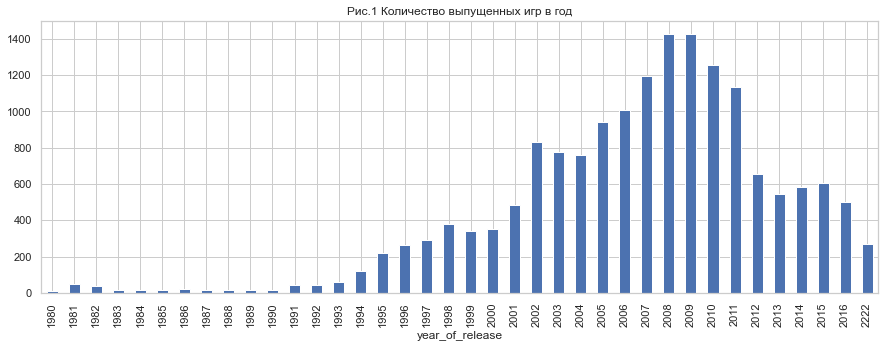

In [231]:

count_games.plot(kind='bar', figsize=(15, 5))
plt.title('Рис.1 Количество выпущенных игр в год')
plt.show()

Количество выпущенных игр с начала 80-х до середины 90-х кажется небольшим относительно остальных лет.  
Хотя к 1982 году игровые автоматы уже приносили больше денег, чем индустрия поп-музыки и кассовые сборы фильмов.  

Производитель электроники *Sony* выпустила *PlayStation* в 1994 году. Она стала первой консолью в истории, проданной более 100 миллионов единиц.   
И с 1994 года мы видим уверенный рост количества видеоигр для консолей и ПК.  

В начале "двухтысячных" рост Интернета и мобильной связи увеличил доход игровой индустрии.  
Пришла эра сетевых сервисов.  

В 2001 году *Microsoft* выпустила на рынок свою первую приставку Xbox и запустила игровую онлайн-платформу *Xbox Live* за ежемесячную абонентскую плату, предоставив игрокам доступ к многопользовательским сервисам и голосовому чату, которые быстро стали незаменимыми для потребителей.  
И началось противостояние *Microsoft* и *Sony*. Обновляя свои консоли и сетевые сервисы они будут мощно подпитывать рынок видеоигр.  

В 2007 *Sony* запускает свой первый сетевой коммерческий сервис *PSOne.*  
В 2007 году *Apple* выпускает свой первый смартфон.  
*Apple* в 2008 году запускает *App Store* для *iPhone,* а магазин приложений для *Mac* появился немного позже. Его представили 6 января 2011.  
В 2010 году *Apple* начинает продавать смартфон *iPhone 4*, ставший эталоном для произвоителей из Кореи и Китая.  
Которые давно оценили перспективы рынка смартфонов и (по образцу *iPhone*) начинают выпускать свои версии с свободной операционной системой *Android* от *Google.*  
И с 2010 года мы видим падение количества выпущенных игр для консолей и ПК связанное с увеличением колиства игр для мобильных устройств.

*Nintendo* в 2012 и *Microsoft* c *Sony* в 2013 году выпускают свои консоли нового поколения и мы видим рост количества выпущенных игр.

За 2016 год данные неполные, поэтому нельзя сказать что количество выпущенных игр в 2016 году уменьшилось по сравнению с преыдущим годом.

### Выберем top10 платформ с наибольшими суммарными продажами.

In [232]:
(games
    .pivot_table('sum_sales', index=['platform'], aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .head(10)
)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Лидеры здесь - транснациональные корпорации *Sony* и *Microsoft*, но старожил *Nintendo* не отстаёт и со своими консолями (портативной *DS* и стационарной *Wii*) уверенно держится в пятерке лидеров.

Остальные в top10 - это преыдущие поколения платформ от тех же лидеров и консоль с незавершенным жизненным циклом.

Замыкает десятку персональный компьютер.

### Посмотрим как менялись продажи по платформам.   
***PlayStation 2*** от *Sony*, эта стационарная консоль выпускалась 3 марта 2000, поддержка прекращена 4 января 2013.  

Это один из самых длинных жизненных циклов в истории игровой индустрии.  
Игровая приставка стала наиболее быстро продаваемой и самой популярной игровой консолью в истории.

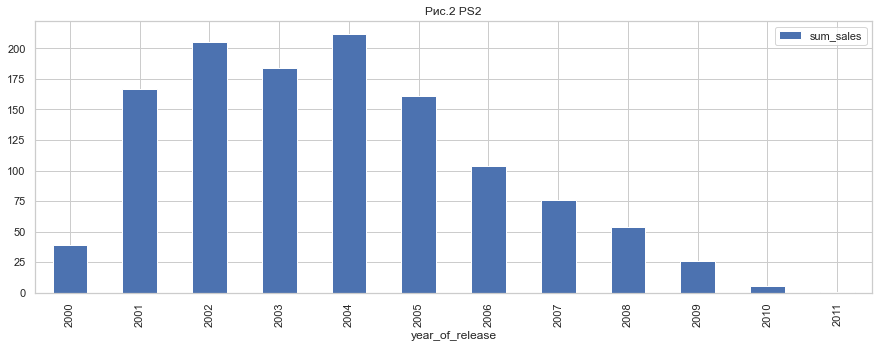

In [230]:
(games
    .query('platform=="PS2"and year_of_release!=2222')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('Рис.2 PS2')
plt.show()

***Xbox 360*** от *Microsoft*, эта стационарная консоль выпускалась с 22 ноября 2005, поддержка прекращена 20 апреля 2016.  
Жизненный цикл  - более 10 лет.

Вторая по счёту игровая приставка компании *Microsoft.*  
Конкурентами являются *PlayStation 3* и *Wii.*  
Некоторые из основных функций *Xbox 360* представлены сервисом *Xbox Live*, позволяющим играть через Интернет, а также загружать разнообразный контент — видеоигры, демоверсии, трейлеры, музыку, ТВ-шоу и т. п.

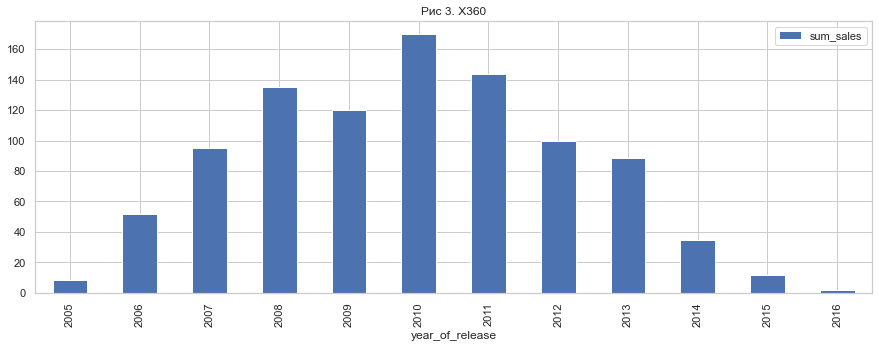

In [227]:
(games
    .query('platform == "X360" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.3 X360')
plt.show()

***PlayStation 3*** от *Sony*, эта стационарная консоль выпускалась с 11 ноября 2006, поддержка во всех странах кроме Японии прекращена в октябре 2016.  
Жизненный цикл - 10 лет.  
И да, такой же жизненный цикл (10 лет) смогла продемонстрировать *Xbox 360.*  
Что говорит о равности возможностей консолей.  
Можно в этом убедиться по запросу в интернете:  
```
"Что лучше Xbox 360 или PlayStation 3?"
```

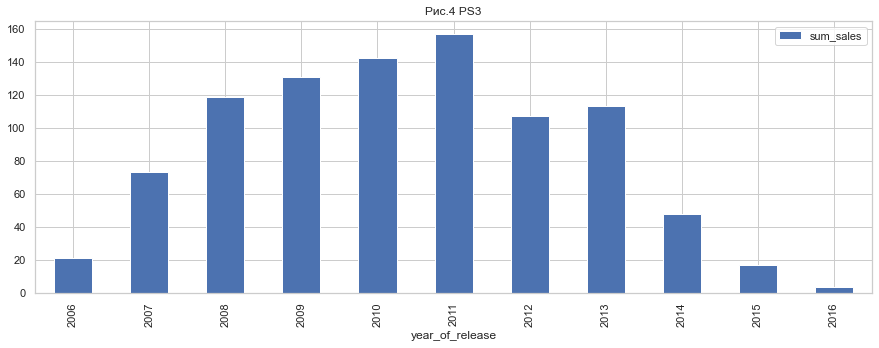

In [229]:
(games
    .query('platform == "PS3" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.4 PS3')
plt.show()

***Wii*** от *Nintendo*, эта стационарная консоль производилась с 19 ноября 2006 года, поддержка прекращена 20 октября 2013.  

Отличительной чертой консоли являются уникальные беспроводные контроллеры *Wii Remote* и *Wii MotionPlus*, реагирующие на движения игрока.  
*Nintendo* не позиционировало свою приставку как соперника *PlayStation 3* и *Xbox 360*, но утверждало, что её консоль ориентирована на более широкую аудиторию, чем у обоих конкурентов.  
При этом *Wii* обеспечила четвертое место по продажам игр в нашем *top10.*  

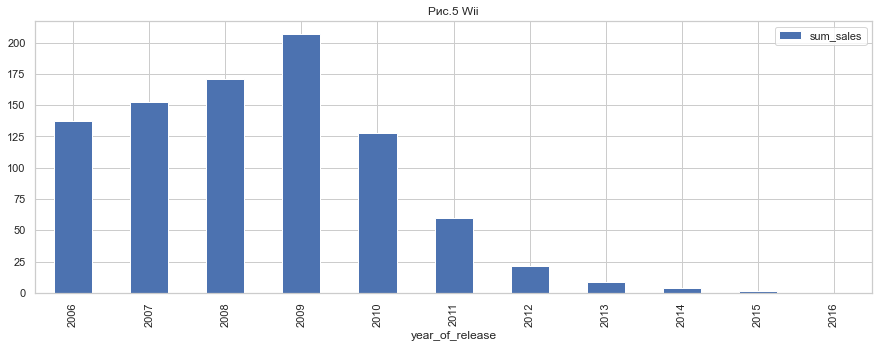

In [233]:
(games
    .query('platform == "Wii" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.5 Wii')
plt.show()

***Nintendo DS*** от (разумеется) *Nintendo*, эта портативная (карманная) консоль выпускалась с 21 ноября 2004, поддержка прекращена 31 августа 2013.  
Жизненный цикл 9 лет. Меньше чем у стационарных консолей.

По состоянию на 31 марта 2016 года все модели *Nintendo DS* вместе были проданы *154,02* миллиона единиц, что сделало ее самой продаваемой портативной игровой консолью.  
  

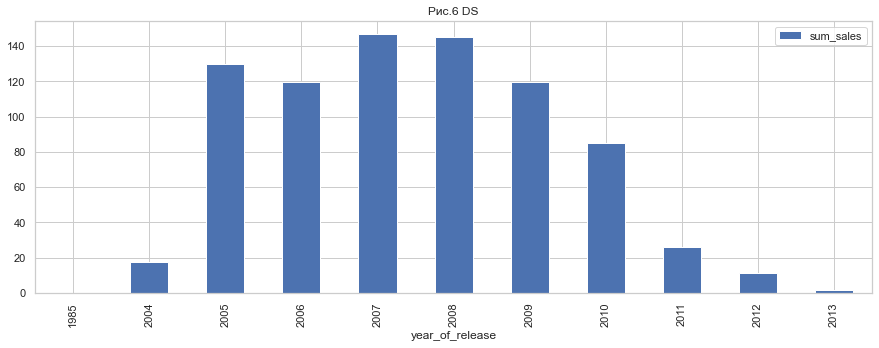

In [234]:
(games
    .query('platform == "DS" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar',figsize = (15, 5))
)
plt.title('Рис.6 DS')
plt.show()

Видим что в диаграмме присутствует 1985 год, хотя консоль выпускается с 2004 года.  
Может быть это доказательство путешествия во времени?  

In [51]:
games[(games['platform'] == 'DS') & (games['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,,0.02


Возможно, это переиздание старой игры.  
С этим надо будет разобраться потом, а пока надо будет учесть это в наших последующих исследованиях.

***PlayStation*** от *Sony*, эта стационарная консоль выпускалась 3 декабря 1994, поддержка прекращена	23 марта 2006.  
Жизненный цикл: почти 12 лет.

Приставка оказалась очень популярной, обеспечив *Sony* прорыв в игровой индустрии, где до того момента безраздельно властвовали *Nintendo* и *Sega.*  
Хотя *PlayStation* не была первой приставкой, использующей формат оптического диска, но она стала первой успешно продаваемой консолью с диском, и эта успешная история завершилась жёсткой конкуренцией с ней консоли на картриджах — *Nintendo 64.*  
Возрастающая сложность игр, их содержания, графики и звука подвели картриджи к предельному объёму.  
Кроме того, для издателей было важно, что себестоимость производства игр на компакт-дисках могла быть снижена при большей гибкости (довольно легко внести изменения для удовлетворения изменяющихся требований), благодаря чему возникла возможность снизить потребительскую цену на консоль.

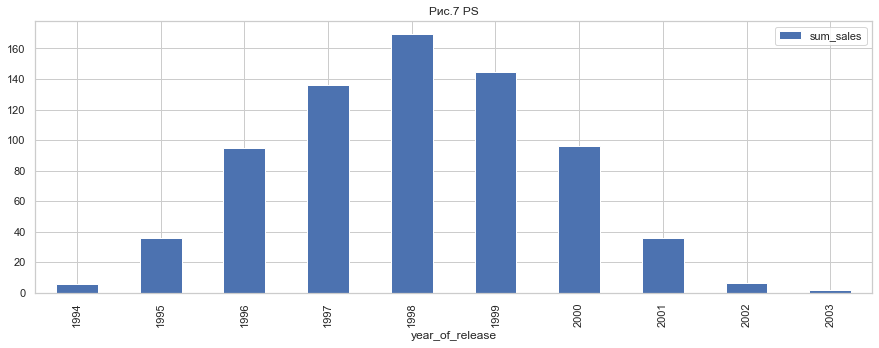

In [235]:
(games
    .query('platform == "PS" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar',figsize = (15, 5))
)
plt.title('Рис.7 PS')
plt.show()

***Game Boy Advance*** от *Nintendo*, эта портативная консоль выпускалась с 21 марта 2001 года, поддержка прекращена в 2008 году.  
Жизненный цикл - 7 лет.  
У следующего поколения (*Nintendo DS*) получится лучше.

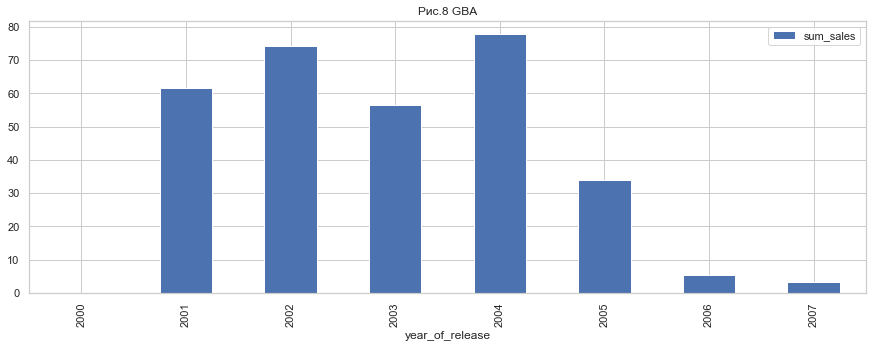

In [236]:
(games
    .query('platform == "GBA" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar',figsize = (15, 5))
)
plt.title('Рис.8 GBA')
plt.show()

In [237]:
games[(games['platform'] == 'GBA') & (games['year_of_release'] == 2000)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
12300,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,Sports,0.05,0.02,0.0,0.0,NaN,NaN,,0.07


Ошибка в данных. Эта игра вышла в [2001](https://en.wikipedia.org/wiki/ESPN_Winter_X-Games_Snowboarding_2002) году.  
Надо будет это учесть в последующих исследованиях.

***PlayStation 4*** от *Sony*, эта стационарная консоль выпускалась с 15 ноября 2013.  
И на момент 2016 года не собиралась на покой. Это надо будет учесть в наших следующих исследованиях.

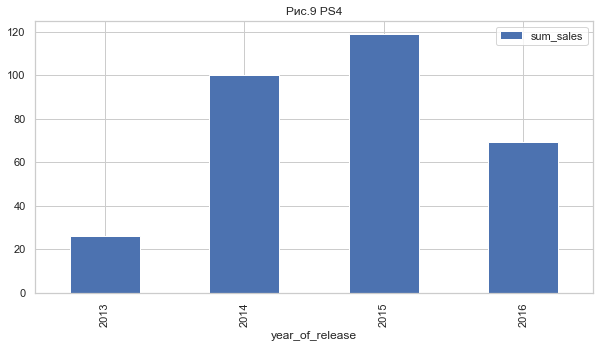

In [238]:
(games
    .query('platform == "PS4" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar',figsize = (10, 5))
)
plt.title('Рис.9 PS4')
plt.show()

***PlayStation Portable*** от *Sony*, эта портативная консоль выпускалась c 12 декабря 2004 года, поддержка прекращена 28 декабря 2011 года.  
Жизненный цикл 7 лет.  
Выйдя на рынок одновременно с *Nintendo DS*, консоль оказалась менее популярной.  
Но игры производились дольше - до 2015 года и это заслуживает отдельного исследования.

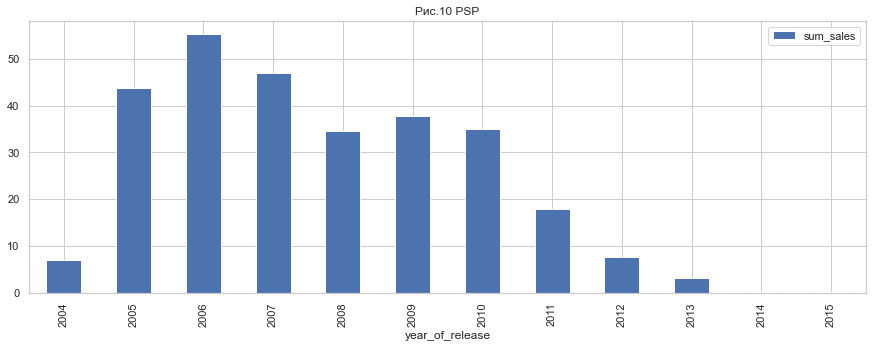

In [239]:
(games
    .query('platform == "PSP" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar',figsize = (15, 5))
)
plt.title('Рис.10 PSP')
plt.show()

***Personal Computer***  
Самый долгий жизненный цикл обусловлен общим названием всех поколений персональных компьютеров - *PC*.

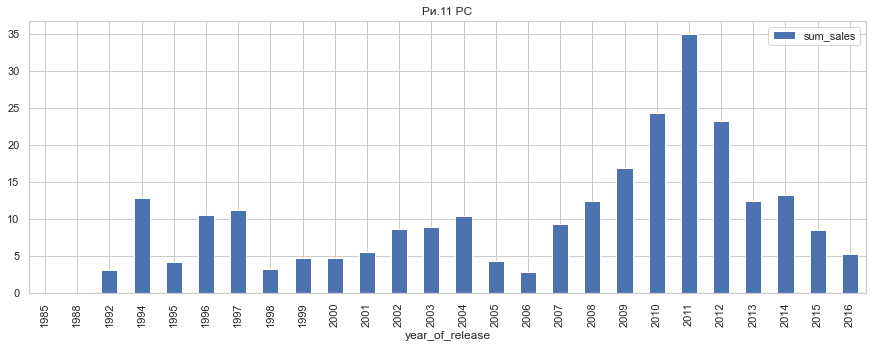

In [240]:
(games
    .query('platform == "PC" and year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar',figsize = (15, 5))
)
plt.title('Ри.11 PC')
plt.show()

### Определим за какой характерный срок появляются новые и исчезают старые платформы
Исключим из выборки платформы с незавершенным жизненным циклом и ПК.  
И вспомним об игре из прошлого у *Nintendo DS*

In [241]:
#ps2
ps2 = games.query('platform == "PS2" & year_of_release != 2222')
ps2_min = ps2['year_of_release'].min()
ps2_max = ps2['year_of_release'].max()
ps2_diff = ps2_max - ps2_min

#x360
x360 = games.query('platform == "X360" & year_of_release != 2222')
x360_min = x360['year_of_release'].min()
x360_max = x360['year_of_release'].max()
x360_diff = x360_max - x360_min

#ps3
ps3 = games.query('platform == "PS3" & year_of_release != 2222')
ps3_min = ps3['year_of_release'].min()
ps3_max = ps3['year_of_release'].max()
ps3_diff = ps3_max - ps3_min

#ds
ds = games.query('platform == "DS" & (year_of_release != 1985 & year_of_release != 2222)')
ds_min = ds['year_of_release'].min()
ds_max = ds['year_of_release'].max()
ds_diff = ds_max - ds_min

#wii
wii = games.query('platform == "Wii" & year_of_release != 2222')
wii_min = wii['year_of_release'].min()
wii_max = wii['year_of_release'].max()
wii_diff = wii_max - wii_min

#ps
ps = games.query('platform == "PS" & year_of_release != 2222')
ps_min = ps['year_of_release'].min()
ps_max = ps['year_of_release'].max()
ps_diff = ps_max - ps_min

#gba
gba = games.query('platform == "GBA" & (year_of_release != 2000 & year_of_release != 2222)')
gba_min = gba['year_of_release'].min()
gba_max = gba['year_of_release'].max()
gba_diff = gba_max - gba_min

#psp
psp = games.query('platform == "PSP" & year_of_release != 2222')
psp_min = psp['year_of_release'].min()
psp_max = psp['year_of_release'].max()
psp_diff = psp_max - psp_min

mean=(ps2_diff + x360_diff + ps3_diff + ds_diff + wii_diff + ps_diff + gba_diff + psp_diff)/8
print('Среднее время жизни платформы: ',mean, 'лет.')

Среднее время жизни платформы:  9.625 лет.


От консоли середины 90-х до консолей середины 2000-х характерен **жизненный цикл почти 10 лет**. 

Интересно, а если разделить консоли по признаку *стционарная/портативная*?

Стационарные консоли у нас: *PlayStation, PlayStation 2, PlayStation 3, Xbox 360 и Wii*

In [242]:
#ps2
ps2 = games.query('platform == "PS2" & year_of_release != 2222')
ps2_min = ps2['year_of_release'].min()
ps2_max = ps2['year_of_release'].max()
ps2_diff = ps2_max - ps2_min

#x360
x360 = games.query('platform == "X360" & year_of_release != 2222')
x360_min = x360['year_of_release'].min()
x360_max = x360['year_of_release'].max()
x360_diff = x360_max - x360_min

#ps3
ps3 = games.query('platform == "PS3" & year_of_release != 2222')
ps3_min = ps3['year_of_release'].min()
ps3_max = ps3['year_of_release'].max()
ps3_diff = ps3_max - ps3_min

#wii
wii = games.query('platform == "Wii" & year_of_release != 2222')
wii_min = wii['year_of_release'].min()
wii_max = wii['year_of_release'].max()
wii_diff = wii_max - wii_min

#ps
ps = games.query('platform == "PS" & year_of_release != 2222')
ps_min = ps['year_of_release'].min()
ps_max = ps['year_of_release'].max()
ps_diff = ps_max - ps_min

mean=(ps2_diff + x360_diff + ps3_diff + wii_diff + ps_diff) / 5
print('Среднее время жизни стационарной платформы: ',mean, 'лет.')

Среднее время жизни стационарной платформы:  10.2 лет.


Более 10 лет служат стационарные консоли.

А сколько портативные?
К портативным относятся: *PlayStation Portable, Game Boy Advance, Nintendo DS*

In [243]:
#ds
ds = games.query('platform == "DS" & (year_of_release != 1985 & year_of_release != 2222)')
ds_min = ds['year_of_release'].min()
ds_max = ds['year_of_release'].max()
ds_diff = ds_max - ds_min

#gba
gba = games.query('platform == "GBA" & (year_of_release != 2000 & year_of_release != 2222)')
gba_min = gba['year_of_release'].min()
gba_max = gba['year_of_release'].max()
gba_diff = gba_max - gba_min

#psp
psp = games.query('platform == "PSP" & year_of_release != 2222')
psp_min = psp['year_of_release'].min()
psp_max = psp['year_of_release'].max()
psp_diff = psp_max - psp_min

mean=(ds_diff + gba_diff + psp_diff) / 3
print('Среднее время жизни портативной платформы: ',mean, 'лет.')

Среднее время жизни портативной платформы:  8.666666666666666 лет.


Портативные консоли имеют чуть меньший срок - почти 9 лет.  

По имеющимся у нас данным получается, что от первых продаж игр для консоли до их исчезновения в среднем проходит 10 лет.  
Так же можно заметить что поддержку консолей производители продолжают до момента прекращения продаж на них, что лочично.  
Прекращение продаж связано с переходом геймеров на новые консоли с большими возможностями.  

В пятерке консолей с наибольшим количеством проданных игр датой выхода в продажу значится середина 2000-х, только лидер - PlayStation 2 - выпустился на рынок в 2000-ом году.

Наиболее популярны стационарные платформы.  
Но портативные консоли так же должны оставаться в поле нашего внимания.


#### Посмотрим самые популярные платформы с 1980 до 2000 года

In [244]:
(games
    .query('year_of_release<2000')
    .pivot_table(index='platform', values='sum_sales', aggfunc=sum)
    .sort_values(by='sum_sales', ascending=False)
    .head()
)

,sum_sales
platform,
PS,586.88
NES,251.05
GB,225.43
SNES,200.04
N64,180.71


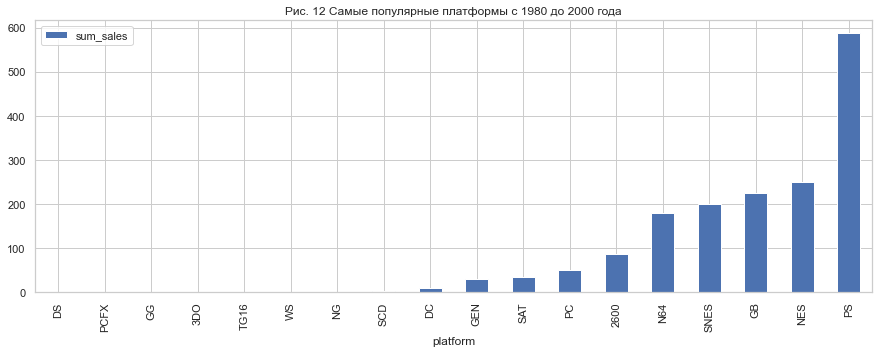

In [246]:
(games
    .query('year_of_release < 2000')
    .pivot_table(index='platform', values='sum_sales', aggfunc=sum)
    .sort_values(by = 'sum_sales')
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('Рис. 12 Самые популярные платформы с 1980 до 2000 года')
plt.show()

***PlayStation*** - легенда от *Sony* лидирует до 2000-х годов по популярности среди всех консолей.   
Относится к стационарным консолям.

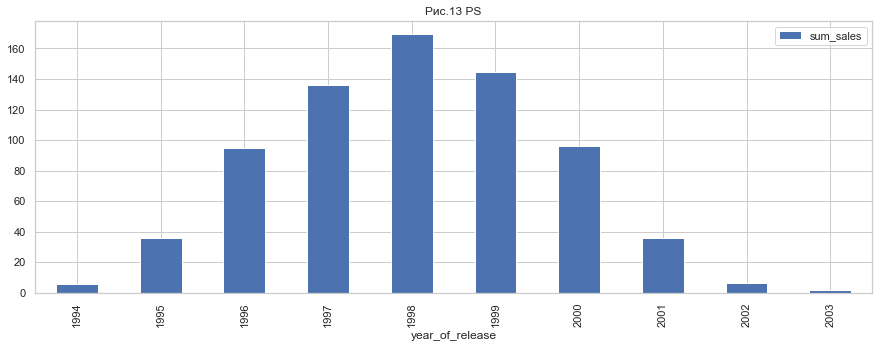

In [247]:
(games
    .query('platform == "PS" & year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.13 PS')
plt.show()

***Nintendo Entertainment System*** от *Nintendo*, эта стационарная консоль выпускалась с 15 июля 1983.  
Поддержка прекращена в 1995 в США, а 25 сентября 2003(!) в Японии.  

Оказалась исключительно удачной и сумела завоевать практически весь американский и японский рынок.  
Поскольку выход консоли произошёл вскоре после кризиса игровой индустрии(1983 год), многие критики именно ей приписывают возрождение игрового рынка.  
С начала 1990-х годов популярность *NES* начала неуклонно снижаться из-за появления более совершенных шестнадцатибитных приставок, прежде всего *Sega Mega Drive* и следующего поколения консолей от самой *Nintendo* — *SNES/Super Famicom.*  

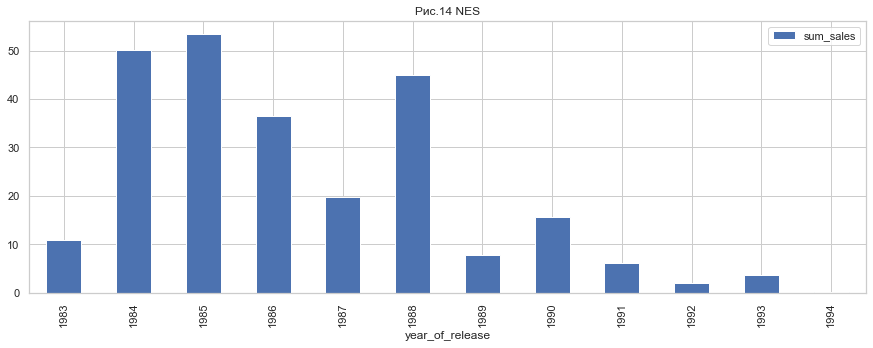

In [249]:
(games
    .query('platform == "NES" & year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.14 NES')
plt.show()

***Game Boy*** первое портативное игровое устройство, разработанное и производившееся *Nintendo* с 21 апреля 1989.  

Это была первая популярная портативная игровая система.  
В нашей выборке учтены игры как для оригинальной *Game Boy*, так и для *Game Boy Color* 1998 года.  
Поэтому такой длинный жизненный цикл.  
И опять появилась игра вышедшая до начала продаж консоли.

Text(0.5, 1.0, 'Рис.15 GB')

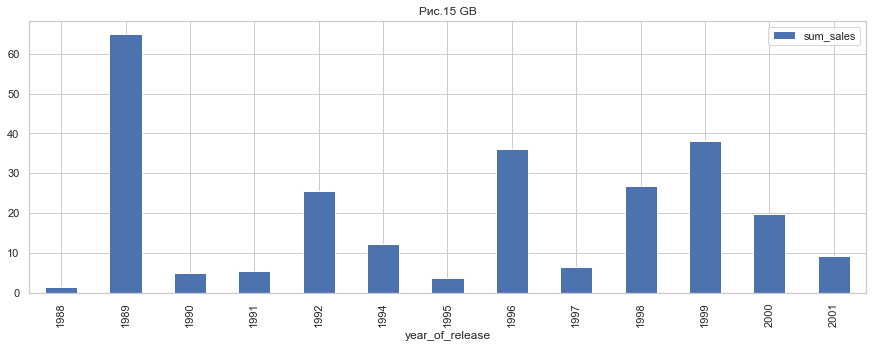

In [250]:
(games
    .query('platform == "GB" & year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.15 GB')

In [86]:
games[(games['platform'] == 'GB') & (games['year_of_release'] == 1988)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1340,Disney's DuckTales,GB,1988,Platform,0.82,0.23,0.35,0.03,NaN,NaN,,1.43


Ошибка при сборе данных?  
Скорее всего. При [поиске в интернете](https://ru.wikipedia.org/wiki/DuckTales_(игра)) можно найти похожую игру за 1990 год.  
Учтём это при дальнейших исследованиях.

***Super Nintendo Entertainment System*** от *Nintendo*, стационарная консоль выпускалась с 21 ноября 1990 года.
Поддержка прекращена 30 ноября 1999 (США) и в Японии - сентябрь 2003 года.

Стала второй домашней консолью *Nintendo* вслед за *NES.*  
Были представлены улучшенные графические и звуковые возможности по сравнению с другими консолями того времени.  
Консоль приобрела популярность во многих странах, став самой продаваемой 16-битной приставкой, несмотря на упорную конкуренцию в Северной Америке со стороны *Sega.*  
Кроме того, разработка дополнительных чипов, которые встраивались в картридж игры, позволяла ей оставаться конкурентоспособной на мировом рынке даже после выхода (в 1994 году) следующего поколения игровых приставок.   

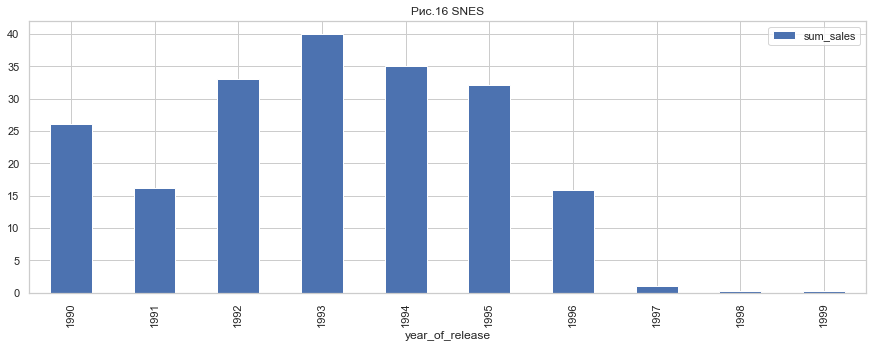

In [251]:
(games
    .query('platform == "SNES" & year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.16 SNES')
plt.show()

***Nintendo 64*** была выпущена в 1996 году и стала ответом на приставки конкурентов *Sony PlayStation* и *Sega Saturn.*  

К 1998 году *N64* даже заняла второе место на рынке игровых приставок после *PlayStation* (проект *Saturn* тогда уже можно было считать провалившимся).

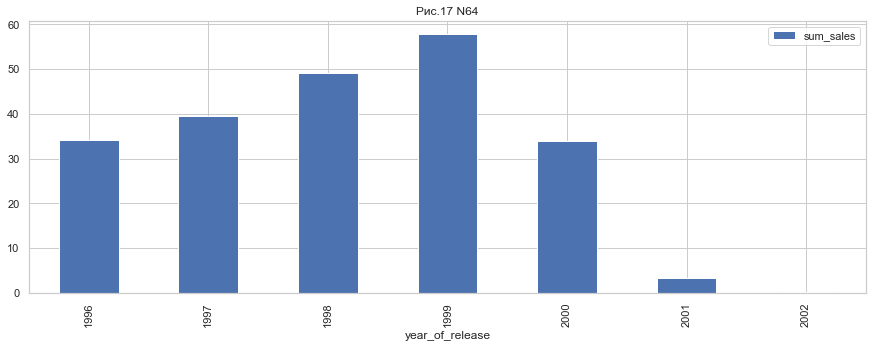

In [252]:
(games
    .query('platform == "N64" & year_of_release != 2222')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum)
    .plot(grid = True, kind = 'bar', figsize = (15, 5))
)
plt.title('Рис.17 N64')
plt.show()

#### Найдём средний срок жизни этих консолей

In [253]:
#ps
ps=games.query('platform == "PS" & year_of_release != 2222')
ps_min=ps['year_of_release'].min()
ps_max=ps['year_of_release'].max()
ps_diff=ps_max-ps_min

#nes
nes=games.query('platform == "NES" & year_of_release != 2222')
nes_min=nes['year_of_release'].min()
nes_max=nes['year_of_release'].max()
nes_diff=nes_max-nes_min

#gb
gb=games.query('platform == "GB" & (year_of_release < 1998 & year_of_release != 1988 & year_of_release != 2222)')
gb_min=gb['year_of_release'].min()
gb_max=gb['year_of_release'].max()
gb_diff=gb_max-gb_min

#snes
snes=games.query('platform == "SNES" & year_of_release != 2222')
snes_min=snes['year_of_release'].min()
snes_max=snes['year_of_release'].max()
snes_diff=snes_max-snes_min

#n64
n64=games.query('platform == "N64" & year_of_release != 2222')
n64_min=n64['year_of_release'].min()
n64_max=n64['year_of_release'].max()
n64_diff=wii_max-wii_min

mean=(ps_diff + nes_diff + gb_diff + snes_diff + n64_diff) / 5
print('Среднее время жизни платформы: ',mean, 'лет.')

Среднее время жизни платформы:  9.4 лет.


Средняя продолжительность жизни платформы, исходя из продолжительности продаж игр на них, чуть менее 9.5 лет до 2000-х годов, и 9.625 лет для консолей нового века.  
Разница очень маленькая.  

#### Какие же данные помогут нам построить прогноз на 2017?

Посмотрим для каких платформ продавались игры в 2016 году

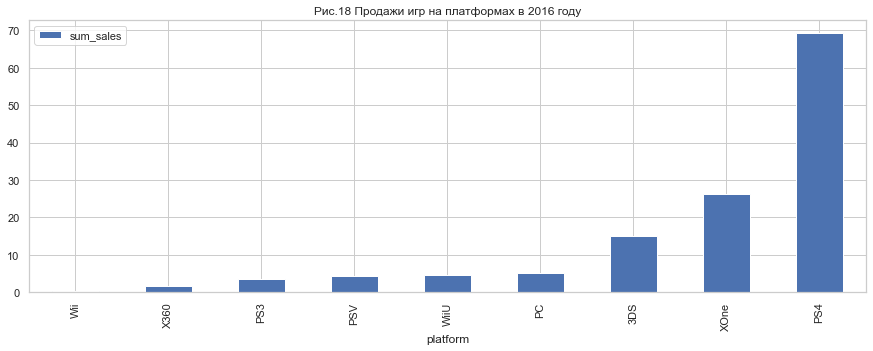

In [254]:
(games
    .query('year_of_release == 2016')
    .pivot_table(index = 'platform', values= 'sum_sales', aggfunc=sum)
    .sort_values(by = ['sum_sales'])
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('Рис.18 Продажи игр на платформах в 2016 году')
plt.show()

Как выяснилось, платформы "живут" в среднем около 10 лет.  
Посмотрим какие продажи у этих платформ за 10 лет.

In [255]:
(games
    .query('platform in ("3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne") & (year_of_release >= 2006 & year_of_release <= 2016)')
    .sort_values(by = ['platform', 'year_of_release'])
    .pivot_table('sum_sales', index=['platform', 'year_of_release'], aggfunc='sum')
    .reset_index(level=['platform', 'year_of_release']) 
)

,platform,year_of_release,sum_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
64,X360,2016,1.52
65,XOne,2013,18.96
66,XOne,2014,54.07
67,XOne,2015,60.14


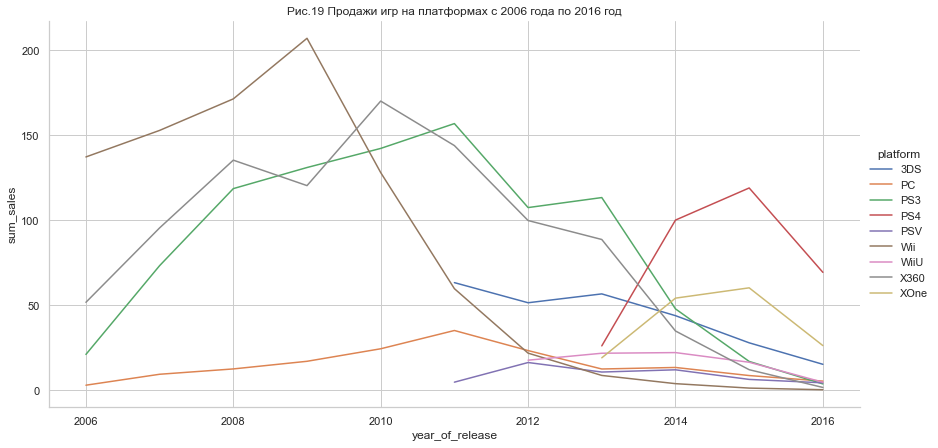

In [257]:
sns.set_style('whitegrid')

sns.relplot(
    data=(games
        .query('platform in ("3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne") & (year_of_release >= 2006 & year_of_release <= 2016)')
        .sort_values(by = ['platform', 'year_of_release'])
        .pivot_table('sum_sales', index=['platform', 'year_of_release'], aggfunc='sum')
        .reset_index(level=['platform', 'year_of_release']) 
        ),
    kind='line',
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    height=6,
    aspect=2
    )
plt.title('Рис.19 Продажи игр на платформах с 2006 года по 2016 год')
plt.show()

Рассмотрим эти же платформы на более коротком сроке:
- от момента появления платформ последнего поколения - 2011 год
- до последнего года с полными данными, что бы не обманываться в тенденциях - 2015 год

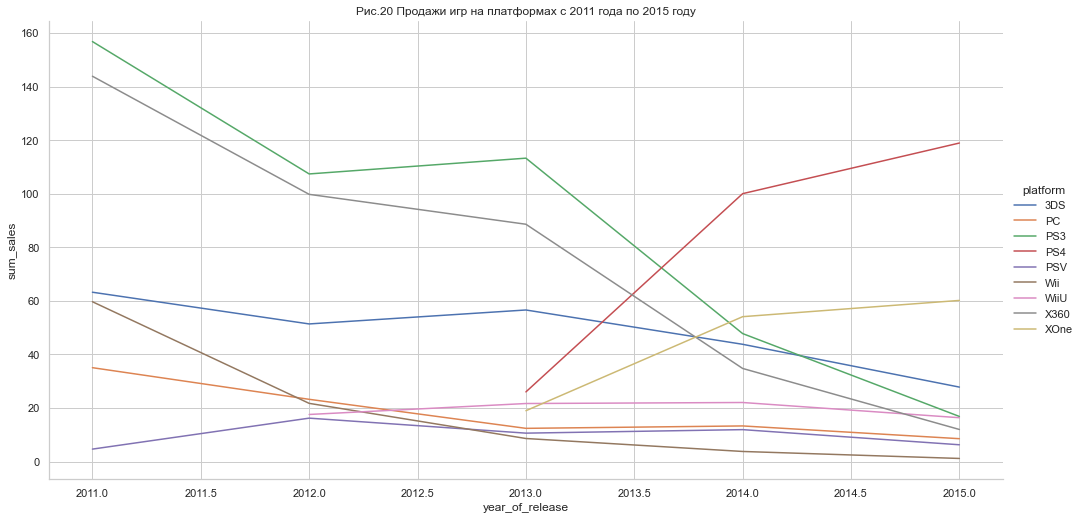

In [258]:
sns.set_style('whitegrid')

sns.relplot(
    data=(games
        .query('platform in ("3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne") & (year_of_release > 2010 & year_of_release < 2016)')
        .sort_values(by = ['platform', 'year_of_release'])
        .pivot_table(index=['platform', 'year_of_release'], values = 'sum_sales', aggfunc='sum')
        .reset_index(level=['platform', 'year_of_release']) 
        ),
    kind='line',
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    height=7,
    aspect=2
    )
plt.title('Рис.20 Продажи игр на платформах с 2011 года по 2015 году')
plt.show()

Начавшие свою "жизнь" десятилетие назад платформы имеют ожидаемо низкие продажи игр к 2015-му году.  

Это, прежде всего, стационарная *Nintendo Wii*, имеющая самые низкие продажи игр из всех консолей.  
У пришедшей ей на смену *Nintendo Wii U* достаточно стабильные продажи игр, но -  по сравнению с продажами конкурентов - невысокие.  

Другой "динозавр" - *Sony PlayStation 3 (PS3)* - заметно снизил продажи игр в 2013 году.  
И это не случайно. В этот год вышла консоль следующего поколения - *Sony PlayStation 4 (PS4).*  
Но продажи игр на платформе продолжаются.

Аналогичная ситуация и с *Xbox 360 (X360)* от *Microsoft*.
Вышедшая на смену *Xbox One (XOne)* подкосила продажи игр предшественника в 2013 году.  
Но *Xbox 360* не сдаётся.

Портативная *Sony PlayStation Vita (PSV)*, начавшая свой жизненный цикл в 2011 году не завоевала популярности, но игры имеют стабильный спрос.

Другая "карманная" консоль - *Nintendo 3DS (3DS)* - имеет больше продаж игр по сравнению не только с конкурентом *(PlayStation Vita)*, но и со "старшим братом"(или "сестрой"?) - *Nintendo Wii U.*

*Personal Computer (PC)* на спаде продаж.
И к 2016 году по уровню продаж игр окажется примерно на одном уровне с *PlayStation Vita* и *Nintendo Wii U.*

Самые "свежие" платформы появились в 2013 году и сразу стали лидировать по продажам игр.  

*Microsoft* публиковала результаты продаж только в первый год после запуска консоли.  
В январе 2016, финансовый директор *Electronic Arts* в финансовом отчёте заявил, что *Microsoft* продали «от 18 до 19 миллионов» единиц *Xbox One*.  
Это ровно половина от 36 миллионов проданных на тот момент *PlayStation 4*, однако больше, чем 12.5 миллионов проданных на тот момент *Nintendo Wii U.*  
То, что *Xbox One* для *PlayStation 4* не смогла составить такую же конкуренцию, как *Xbox 360* для *Sony PlayStation 3*, видно по нашему графику продаж игр.

Портативная *Nintendo 3DS* имеет меньшие продажи игр, но они стабильны.  
Скорее всего, какая-то доля играющиех на портативных консолях перешлина на игры в смартфонах.  
А то, что предлагает *3DS* достаточно уникально (например, трёхмерный эффект изображения) для играков с этой консолью, чтобы приносить стабильный доход производителям игр и обеспечивать продажи самой платформы.

**Потенциал по прибыльности явно больше всего у *Xbox One*, *PlayStation 4* и *3DS*.**  



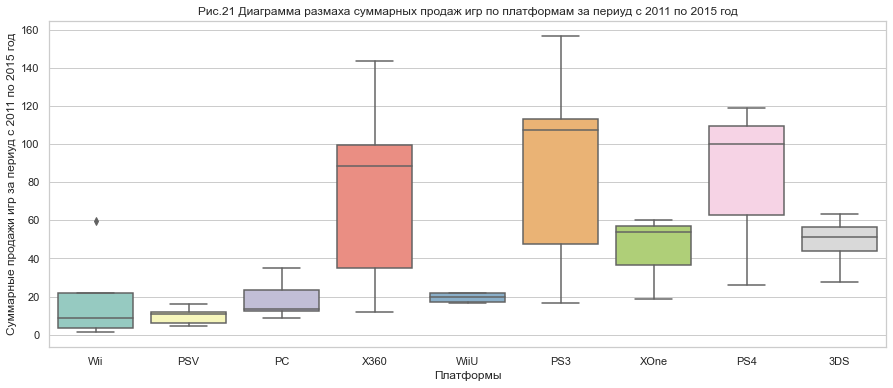

In [286]:
plt.figure(figsize=(15, 6))
sns.set_style('whitegrid')
sns.boxplot(x='platform',
            y='sum_sales',
            data=(games
                    .query('platform in ("3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne") & (year_of_release > 2010 & year_of_release < 2016)')
                    .sort_values(by = ['platform', 'year_of_release'])
                    .pivot_table(index=['platform', 'year_of_release'], values = 'sum_sales', aggfunc='sum')
                    .reset_index(level=['platform', 'year_of_release']) 
                    .sort_values(by = 'sum_sales')
                    ),
            palette='Set3')
plt.ylabel('Суммарные продажи игр за периуд с 2011 по 2015 год')
plt.xlabel('Платформы')
plt.title('Рис.21 Диаграмма размаха суммарных продаж игр по платформам за периуд с 2011 по 2015 год')
plt.show()

Мы уже выяснили что продажи консолей, вышедших около 10 лет назад, на спаде.  
Исключим их из нашей выборки.

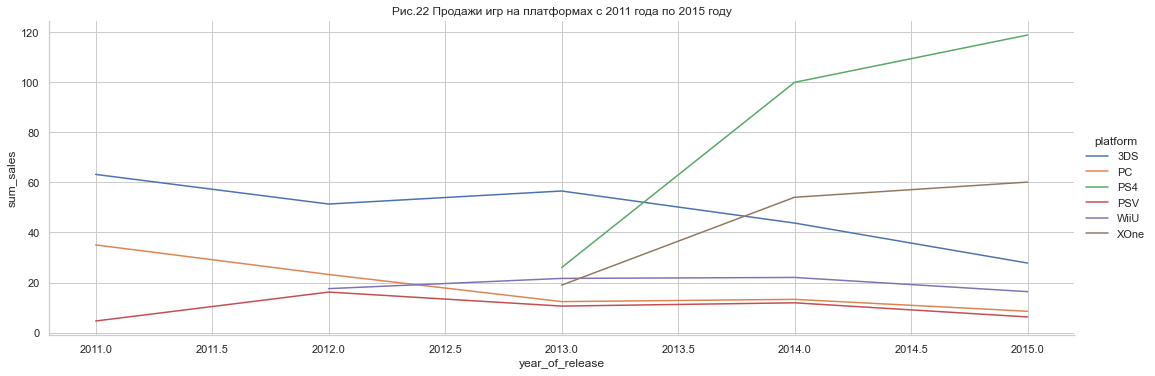

In [262]:
sns.set_style('whitegrid')
sns.relplot(
    data=(games
        .query('platform in ("3DS", "PC", "PS4", "PSV", "WiiU", "XOne") & (year_of_release >= 2011 & year_of_release < 2016)')
        .sort_values(by = ['platform', 'year_of_release'])
        .pivot_table('sum_sales', index=['platform', 'year_of_release'], aggfunc='sum')
        .reset_index(level=['platform', 'year_of_release']) 
        ),
    kind='line',
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    height=5,
    aspect=3
    )
plt.title('Рис.22 Продажи игр на платформах с 2011 года по 2015 году')
plt.show()

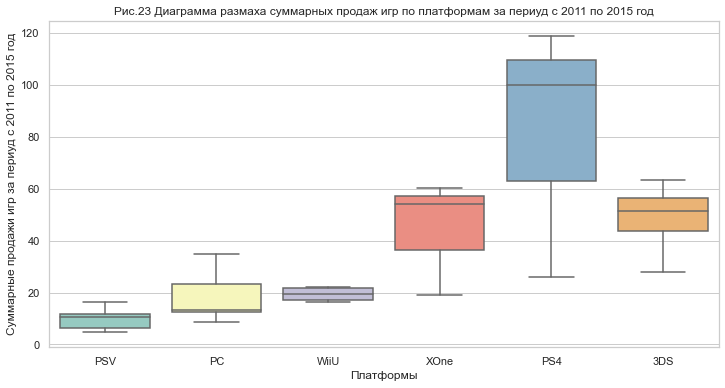

In [263]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.boxplot(x='platform',
            y='sum_sales',
            data=(games
                    .query('platform in ("3DS", "PC", "PS4", "PSV", "WiiU", "XOne") & (year_of_release > 2010 & year_of_release < 2016)')
                    .sort_values(by = ['platform', 'year_of_release'])
                    .pivot_table(index=['platform', 'year_of_release'], values = 'sum_sales', aggfunc='sum')
                    .reset_index(level=['platform', 'year_of_release']) 
                    .sort_values(by = 'sum_sales')
                    ),
            palette='Set3')
plt.ylabel('Суммарные продажи игр за периуд с 2011 по 2015 год')
plt.xlabel('Платформы')
plt.title('Рис.23 Диаграмма размаха суммарных продаж игр по платформам за периуд с 2011 по 2015 год')
plt.show()

Как и предполагалось, лидеры - *PS4*, *XOne* и *3DS.*  
Для *PC, PSV* и *WiiU* нужно отдельно исследовать наиболее прибыльные игры последних лет.


#### Посмотрим как влияют на продажи отзывы пользователей и критиков.


In [267]:
(games
 .query('platform in ("3DS", "PC", "PS4", "PSV", "WiiU", "XOne")')
 .pivot_table(index = 'name', values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score'), aggfunc='sum')
 .corr()
 .style.background_gradient(cmap='coolwarm')
)


,critic_score,eu_sales,jp_sales,na_sales,other_sales,sum_sales,user_score
critic_score,1.000000,0.368182,-0.039265,0.318964,0.390291,0.335519,0.907398
eu_sales,0.368182,1.000000,0.264830,0.757132,0.883656,0.915141,0.280507
jp_sales,-0.039265,0.264830,1.000000,0.354011,0.233640,0.487500,-0.046621
na_sales,0.318964,0.757132,0.354011,1.000000,0.867669,0.929953,0.251389
other_sales,0.390291,0.883656,0.233640,0.867669,1.000000,0.919777,0.302526
sum_sales,0.335519,0.915141,0.487500,0.929953,0.919777,1.000000,0.256632
user_score,0.907398,0.280507,-0.046621,0.251389,0.302526,0.256632,1.000000


Зависимость продаж игр от оценок играков и критиков низкая.

Рассмотрим каждую платформу в отдельности.

In [107]:
(games
 .query('platform == "PSV"')
 .pivot_table(index = 'name', values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score'), aggfunc='sum')
 .corr()
 .style.background_gradient(cmap='coolwarm')
)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,sum_sales,user_score
critic_score,1.000000,0.333222,0.133050,0.445064,0.391655,0.404339,0.882284
eu_sales,0.333222,1.000000,0.210017,0.749647,0.951320,0.901644,0.315145
jp_sales,0.133050,0.210017,1.000000,0.129234,0.215143,0.514333,0.126398
na_sales,0.445064,0.749647,0.129234,1.000000,0.868288,0.847841,0.406161
other_sales,0.391655,0.951320,0.215143,0.868288,1.000000,0.934432,0.373589
sum_sales,0.404339,0.901644,0.514333,0.847841,0.934432,1.000000,0.377944
user_score,0.882284,0.315145,0.126398,0.406161,0.373589,0.377944,1.000000


In [108]:
(games
 .query('platform == "PC"')
 .pivot_table(index = 'name', values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score'), aggfunc='sum')
 .corr()
 .style.background_gradient(cmap='coolwarm')
)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,sum_sales,user_score
critic_score,1.000000,0.089978,0.051964,0.024494,0.133509,0.080065,0.739201
eu_sales,0.089978,1.000000,-0.015447,0.406418,0.559425,0.863318,0.009920
jp_sales,0.051964,-0.015447,1.000000,0.399245,-0.015296,0.203503,0.049724
na_sales,0.024494,0.406418,0.399245,1.000000,0.393653,0.805978,-0.003275
other_sales,0.133509,0.559425,-0.015296,0.393653,1.000000,0.639062,0.050615
sum_sales,0.080065,0.863318,0.203503,0.805978,0.639062,1.000000,0.009577
user_score,0.739201,0.009920,0.049724,-0.003275,0.050615,0.009577,1.000000


In [109]:
(games
 .query('platform == "WiiU"')
 .pivot_table(index = 'name', values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score'), aggfunc='sum')
 .corr()
 .style.background_gradient(cmap='coolwarm')
)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,sum_sales,user_score
critic_score,1.000000,0.337400,0.203677,0.294796,0.308591,0.298124,0.861333
eu_sales,0.337400,1.000000,0.860098,0.958772,0.976412,0.984567,0.313890
jp_sales,0.203677,0.860098,1.000000,0.808387,0.824345,0.895940,0.187089
na_sales,0.294796,0.958772,0.808387,1.000000,0.994516,0.982155,0.263287
other_sales,0.308591,0.976412,0.824345,0.994516,1.000000,0.988421,0.279122
sum_sales,0.298124,0.984567,0.895940,0.982155,0.988421,1.000000,0.271140
user_score,0.861333,0.313890,0.187089,0.263287,0.279122,0.271140,1.000000


In [110]:
(games
 .query('platform == "XOne"')
 .pivot_table(index = 'name', values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score'), aggfunc='sum')
 .corr()
 .style.background_gradient(cmap='coolwarm')
)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,sum_sales,user_score
critic_score,1.000000,0.259398,0.149927,0.259740,0.270032,0.274839,0.774153
eu_sales,0.259398,1.000000,0.421071,0.765367,0.852986,0.898045,0.105354
jp_sales,0.149927,0.421071,1.000000,0.425725,0.441717,0.452701,0.090304
na_sales,0.259740,0.765367,0.425725,1.000000,0.988088,0.970433,0.112752
other_sales,0.270032,0.852986,0.441717,0.988088,1.000000,0.995238,0.113772
sum_sales,0.274839,0.898045,0.452701,0.970433,0.995238,1.000000,0.116563
user_score,0.774153,0.105354,0.090304,0.112752,0.113772,0.116563,1.000000


In [111]:
(games
 .query('platform == "PS4"')
 .pivot_table(index = 'name', values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score'), aggfunc='sum')
 .corr()
 .style.background_gradient(cmap='coolwarm')
)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,sum_sales,user_score
critic_score,1.000000,0.221950,0.011250,0.217381,0.229948,0.227550,0.900850
eu_sales,0.221950,1.000000,0.464563,0.785362,0.944698,0.958157,0.111441
jp_sales,0.011250,0.464563,1.000000,0.472981,0.496467,0.527129,-0.027284
na_sales,0.217381,0.785362,0.472981,1.000000,0.944259,0.928160,0.109930
other_sales,0.229948,0.944698,0.496467,0.944259,1.000000,0.998051,0.115411
sum_sales,0.227550,0.958157,0.527129,0.928160,0.998051,1.000000,0.113116
user_score,0.900850,0.111441,-0.027284,0.109930,0.115411,0.113116,1.000000


In [112]:
(games
 .query('platform == "3DS"')
 .pivot_table(index = 'name', values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score'), aggfunc='sum')
 .corr()
 .style.background_gradient(cmap='coolwarm')
)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,sum_sales,user_score
critic_score,1.000000,0.182102,0.055181,0.218187,0.207810,0.167239,0.907974
eu_sales,0.182102,1.000000,0.686602,0.943314,0.971126,0.951910,0.167187
jp_sales,0.055181,0.686602,1.000000,0.664500,0.672835,0.852455,0.041041
na_sales,0.218187,0.943314,0.664500,1.000000,0.990901,0.949942,0.199662
other_sales,0.207810,0.971126,0.672835,0.990901,1.000000,0.958162,0.188983
sum_sales,0.167239,0.951910,0.852455,0.949942,0.958162,1.000000,0.149687
user_score,0.907974,0.167187,0.041041,0.199662,0.188983,0.149687,1.000000


Линейная зависимость между оценками критиков с пользователями и продажами игр минимальна.  
Посмотрим что на графиках.

Построим графики зависимости продаж игр от оценок для нашей "великолепной шестёрки" платформ.

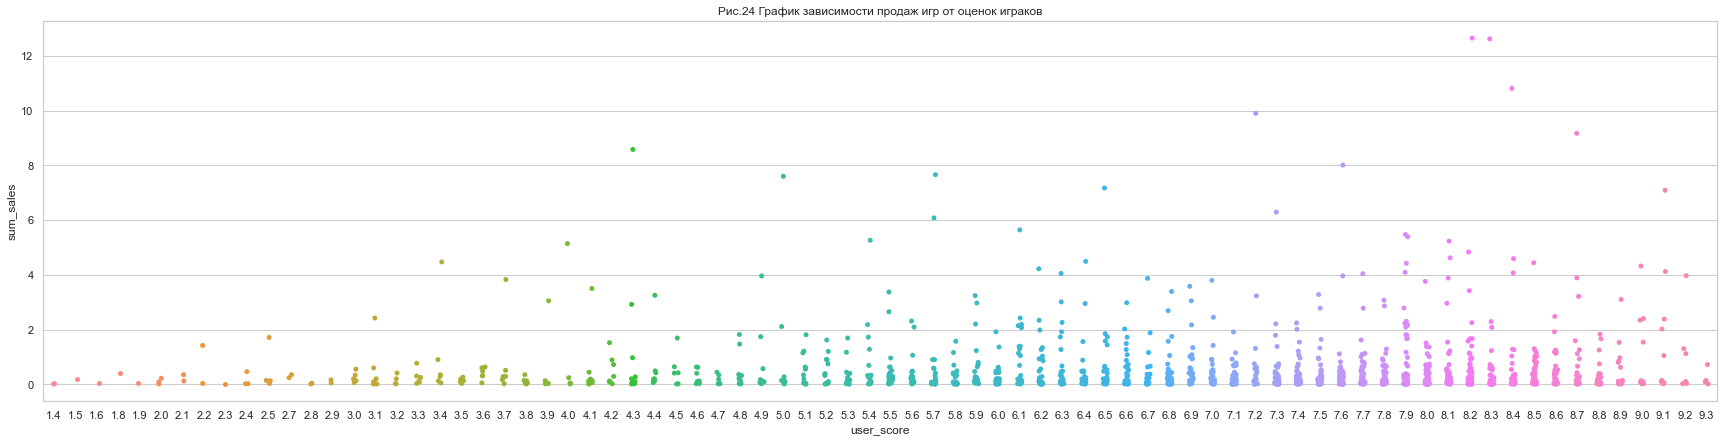

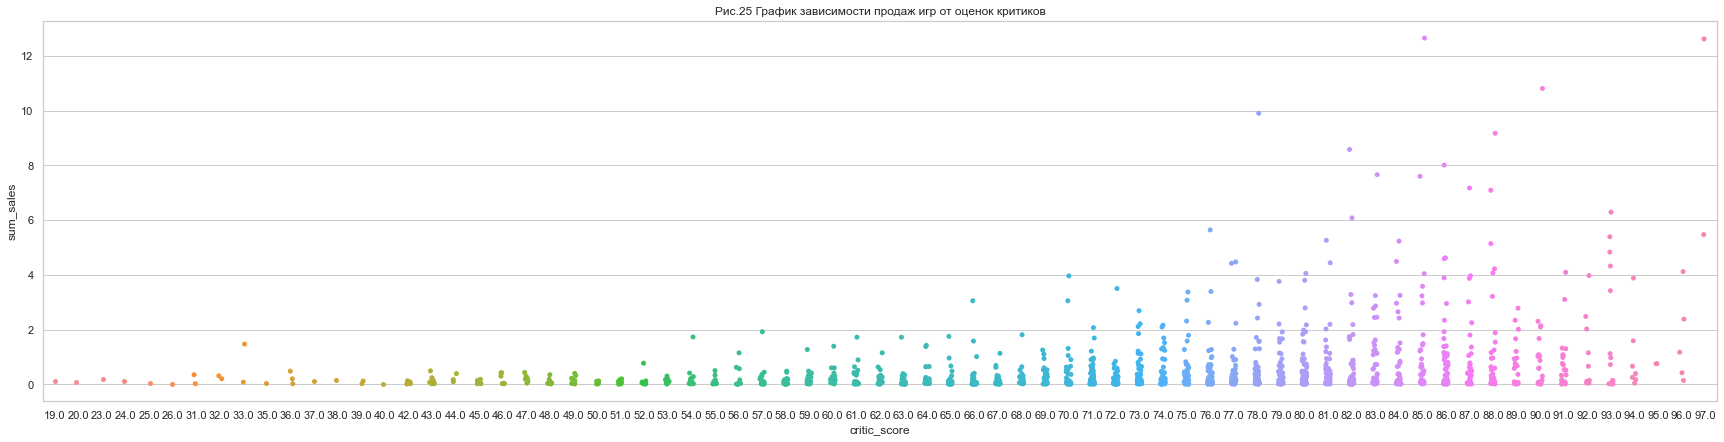

In [270]:
plt.figure(figsize=(30,7))
sns.set_style('whitegrid')
sns.stripplot(x = 'user_score',
              y = 'sum_sales',
              data = (games
                        .query('platform in ("3DS", "PC", "PS4", "PSV", "WiiU", "XOne")')),
              jitter = True)
plt.title('Рис.24 График зависимости продаж игр от оценок играков')
plt.show()

plt.figure(figsize=(30,7))
sns.stripplot(x = 'critic_score',
              y = 'sum_sales',
              data = (games
                        .query('platform in ("3DS", "PC", "PS4", "PSV", "WiiU", "XOne")')
                     ),
              jitter = True)
plt.title('Рис.25 График зависимости продаж игр от оценок критиков')
plt.show()

При более высоких оценках - более высокие продажи игр.

Возьмём две платформы: 
1. С самой высокой линейной зависимостью продаж игр от оценок (*PSV*)
2. С самой низкой линейной зависимостью продаж игр от оценок (*PC*)

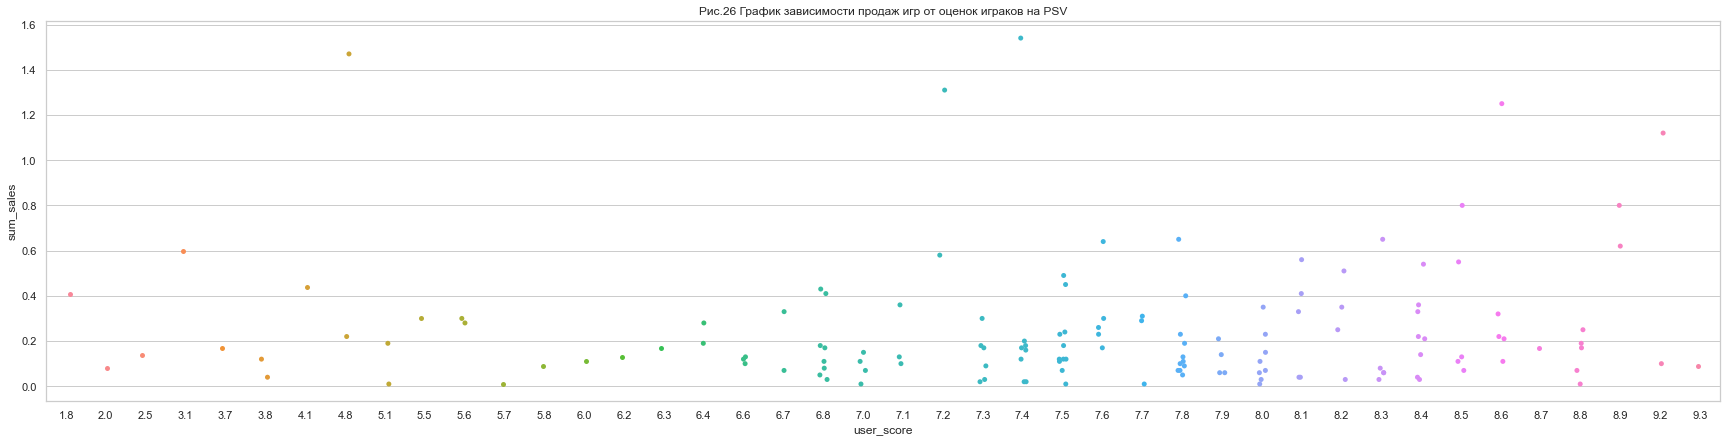

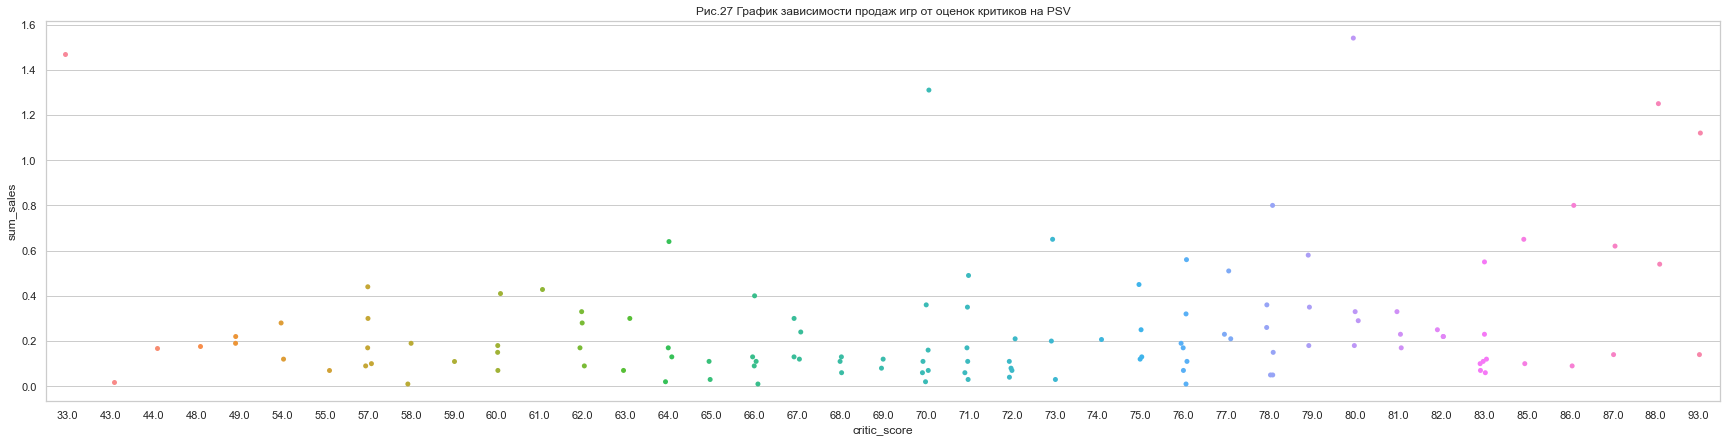

In [273]:
plt.figure(figsize=(30,7))
sns.set_style('whitegrid')
sns.stripplot(x = 'user_score',
              y = 'sum_sales',
              data = (games
                        .query('platform == "PSV"')
                     ),
              jitter = True)
plt.title('Рис.26 График зависимости продаж игр от оценок играков на PSV')
plt.show()

plt.figure(figsize=(30,7))
sns.stripplot(x = 'critic_score',
              y = 'sum_sales',
              data = (games
                        .query('platform == "PSV"')
                     ),
              jitter = True)
plt.title('Рис.27 График зависимости продаж игр от оценок критиков на PSV')
plt.show()

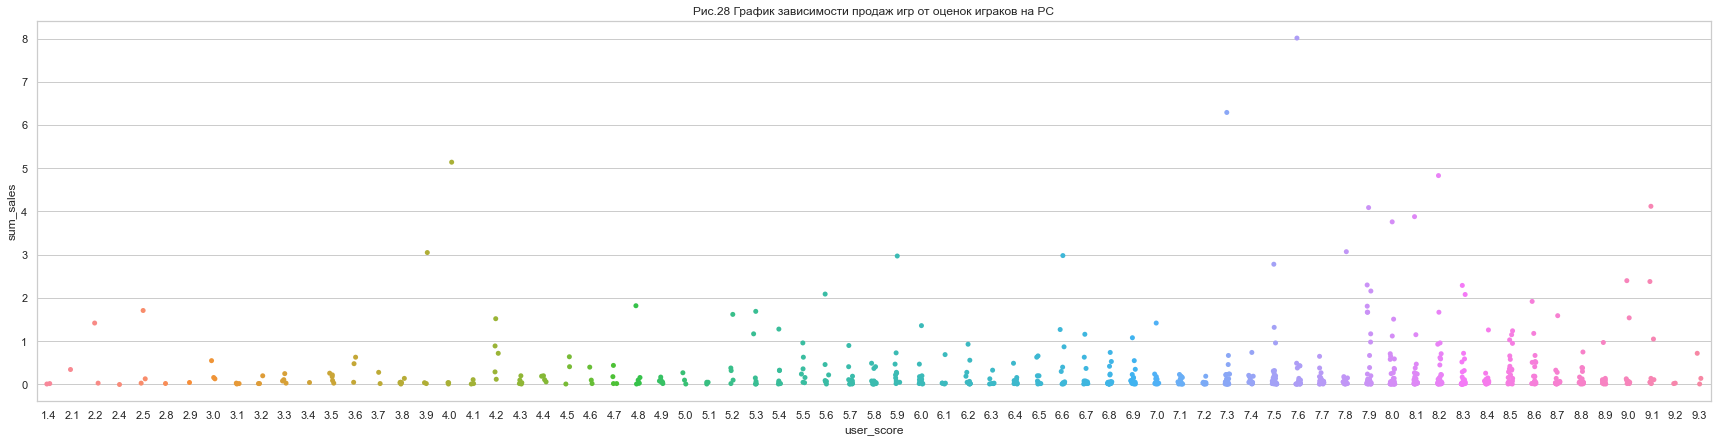

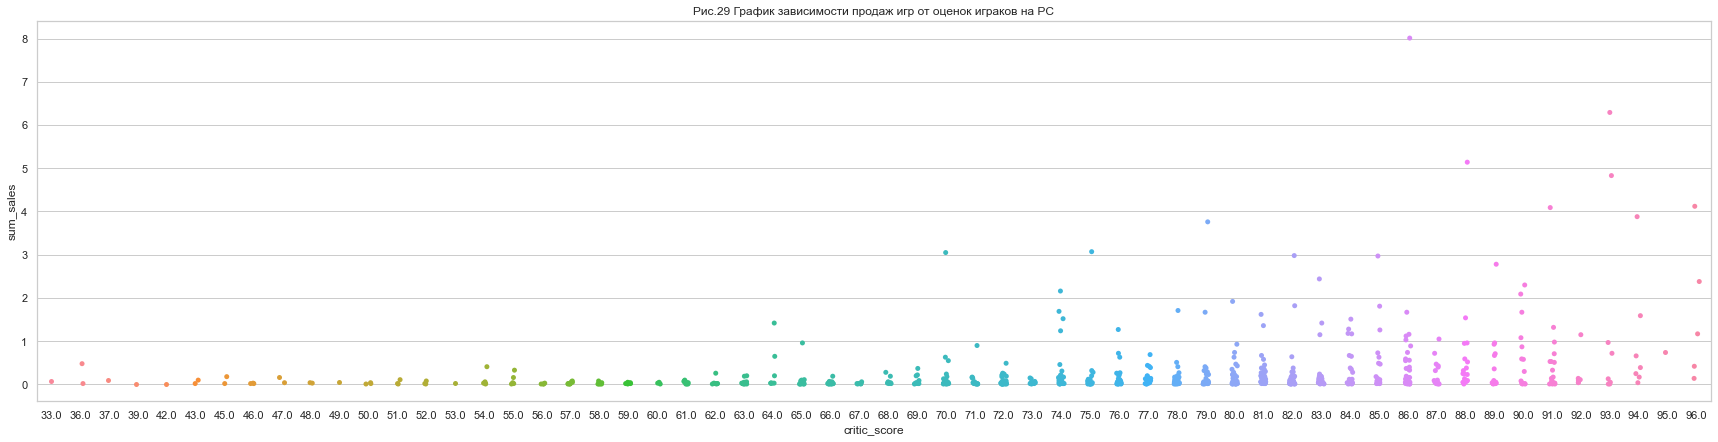

In [274]:
plt.figure(figsize=(30,7))
sns.set_style('whitegrid')
sns.stripplot(x = 'user_score',
              y = 'sum_sales',
              data = (games
                        .query('platform == "PC"')
                     ),
              jitter = True)
plt.title('Рис.28 График зависимости продаж игр от оценок играков на PC')
plt.show()

plt.figure(figsize=(30,7))
sns.stripplot(x = 'critic_score',
              y = 'sum_sales',
              data = (games
                        .query('platform == "PC"')
                     ),
              jitter = True)
plt.title('Рис.29 График зависимости продаж игр от оценок играков на PC')
plt.show()

Чем выше оценки - тем больше продажи.  
Здесь мы видим корреляцию продаж игр и оценок игр.  
Но прямая это зависимость? Или зависимость от качества игр?  
Качетвенно сд
еланные игры, имеющие интересный гемплей для играков, больше покупают и оценки у них высокие.
Это требует исследований.

И, если мы построим графики зависимости продаж от оценок для остальных платформ, будет примерно такая же картина.

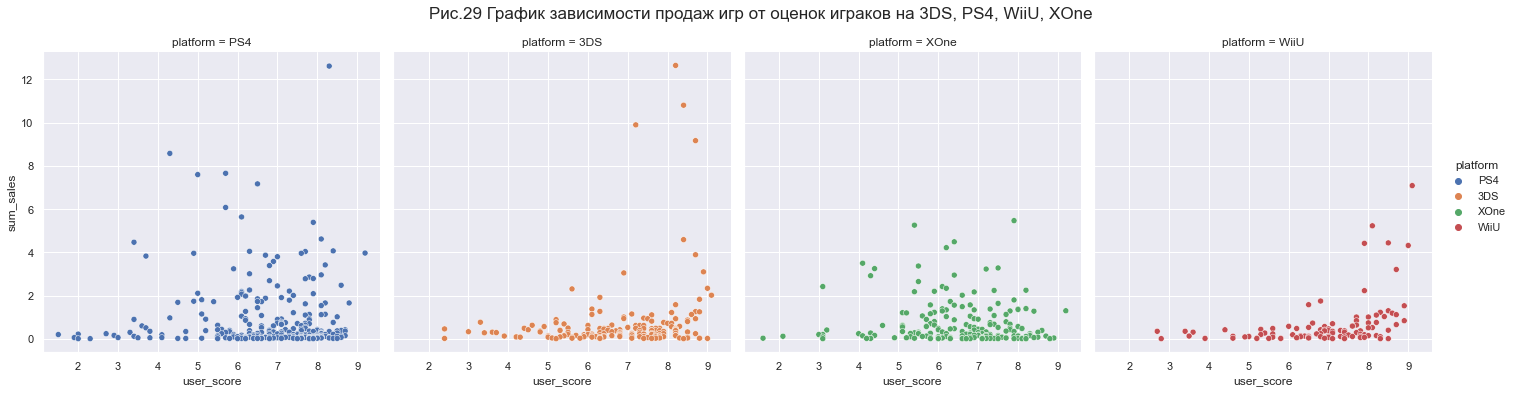

In [325]:

sns.set()
g = sns.relplot(
    x = 'user_score',
    y = 'sum_sales',
    data = (games
                .query('platform in ("3DS", "PS4", "WiiU", "XOne")')
            ),
    col = 'platform',
    hue = 'platform'
    )

g.fig.suptitle('Рис.29 График зависимости продаж игр от оценок играков на 3DS, PS4, WiiU, XOne',
               y = 1.05,
               fontsize = 17
              )
plt.show()

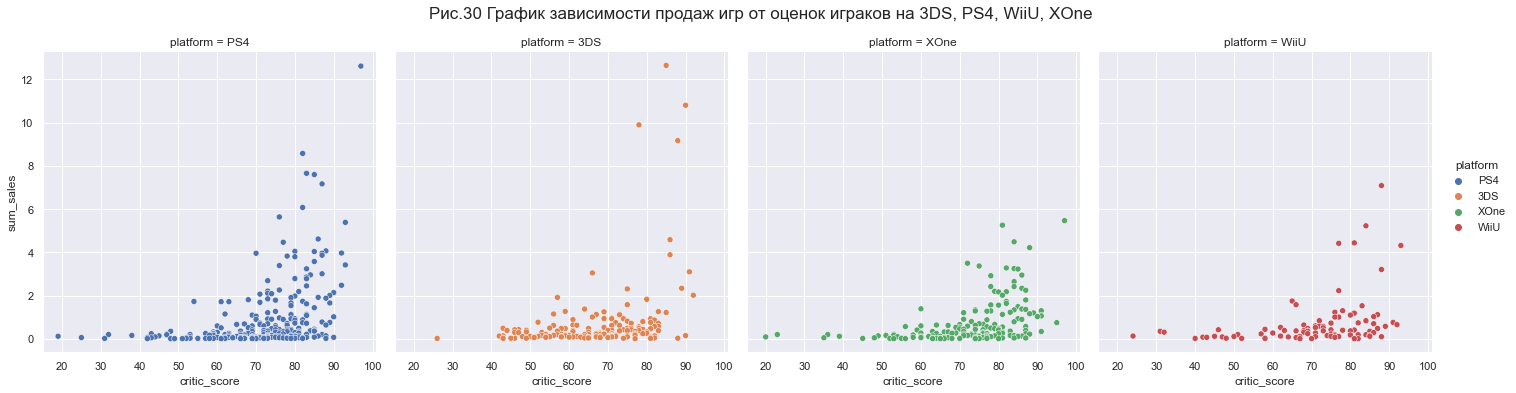

In [326]:
sns.set()
g = sns.relplot(
    x = 'critic_score',
    y = 'sum_sales',
    data = (games
                .query('platform in ("3DS", "PS4", "WiiU", "XOne")')
            ),
    col = 'platform',
    hue = 'platform'
    )

g.fig.suptitle('Рис.30 График зависимости продаж игр от оценок играков на 3DS, PS4, WiiU, XOne',
               y = 1.05,
               fontsize = 17
              )
plt.show()

Пока примем очевидное: выше оценки - выше продажи.

### Посмотрим на общее распределение игр по жанрам. 

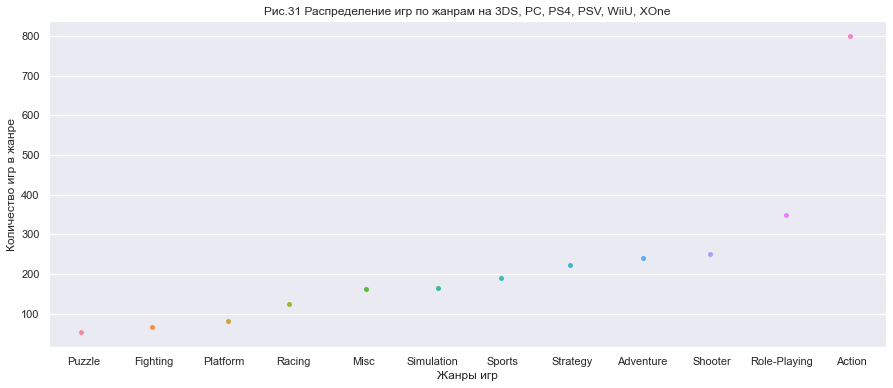

In [283]:
plt.figure(figsize=(15, 6))
sns.set()
sns.stripplot(x = 'genre',
              y = 'name',
              data = (games
                        .query('platform in ("3DS", "PC", "PS4", "PSV", "WiiU", "XOne")')
                        .pivot_table(index='genre', values = 'name', aggfunc='count')
                        .reset_index(level='genre')
                        .sort_values(by = 'name')
                     ),
              jitter = True)
plt.xlabel('Жанры игр')
plt.ylabel('Количество игр в жанре')
plt.title('Рис.31 Распределение игр по жанрам на 3DS, PC, PS4, PSV, WiiU, XOne')
plt.show()

Экшен (*action в переводе с англ. — «действие»*) или боевик (по аналогии с киножанром) — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. Жанр представлен во множестве разновидностей от файтингов (*Fighting*), шутеров (*Shooter*) и платформеров (*Platform*), которые считаются наиболее важными для жанра, до некоторых стратегий в реальном времени, которые возможно отнести к жанру экшен.  

Вот в чем секрет лидерсва *Action*-игр. Это общее название для большого семейтва жанров игр.  

Классификация компьютерных игр является междисциплинарной категорией, которая изучается в рамках культурологии, философии, эстетики и на их пересечении.  
Активно применяется подход, основанный на системе правил, по аналогии с классификацией фильмов.  
Тема является обширной и рассматривается в ряде исследовательских работ.  
Мы воспользуемся традиционной классификацией.

|Жанр	|Синонимы	|Описание|
|:-----:|:---------:|:-------|
|Действие	|Action, Эншн, Экшен	|Требующие хорошей моторики, глазомера|
|Симулятор	|Simulation, Симуляция	|Имитирующее определённые направления деятельности|
|Стратегия	|Strategy	|С упором на управление ресурсами|
|Ролевая игра	|Role-playing Games	|С развитой системой изменения персонажей|
|Приключения	|Adventure	|Предполагающие преодоление различных препятствии на пути персонажа|
|Головоломка	|Puzzle	|Заключающиеся в решение логических задач, построенных на общем наборе правил|

Итак, в последние годы игроки предпочитают *Action.*  

Обратимся ко всей истории видеоигр, и узнаем какой же самый популярный жанр.

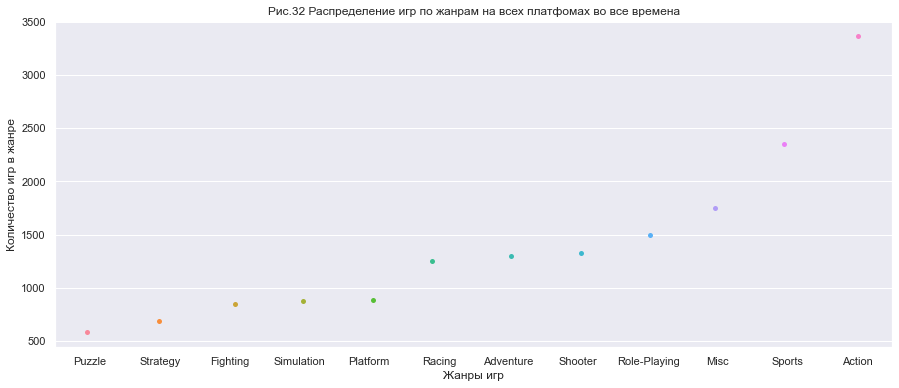

In [285]:
plt.figure(figsize=(15, 6))
sns.set()
sns.stripplot(x = 'genre',
              y = 'name',
              data = (games
                        .pivot_table(index='genre', values = 'name', aggfunc='count')
                        .reset_index(level='genre')
                        .sort_values(by = 'name')
                     ),
              jitter = True)
plt.xlabel('Жанры игр')
plt.ylabel('Количество игр в жанре')
plt.title('Рис.32 Распределение игр по жанрам на всех платфомах во все времена')
plt.show()

И здесь *Action* впереди всех. Если же добавить к нему и все поджанры - получится безоговорочный лидер.

Можно сделать вывод, что *Action* является и самым прибыльным жанром.  
Убедимся в этом.

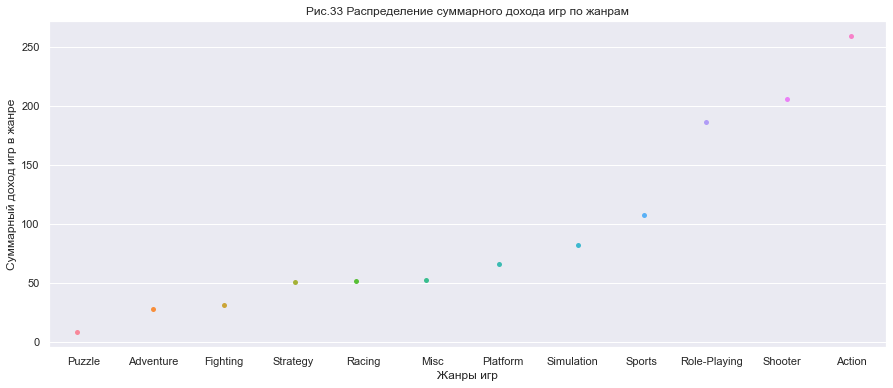

In [290]:
plt.figure(figsize=(15, 6))
sns.set()
sns.stripplot(x = 'genre',
              y = 'sum_sales',
              data = (games
                        .query('platform in ("3DS", "PC", "PS4", "PSV", "WiiU", "XOne")')
                        .pivot_table(index='genre', values = 'sum_sales', aggfunc='sum')
                        .reset_index(level='genre')
                        .sort_values(by = 'sum_sales')
                     ),
              jitter = True)
plt.xlabel('Жанры игр')
plt.ylabel('Суммарный доход игр в жанре')
plt.title('Рис.33 Распределение суммарного дохода игр по жанрам')
plt.show()

Геймеры предпочитают стрелять, драться, бегать и прыгать.  
В видеоиграх.

Зависимость между количеством выпущенных игр и суммарным доходом справедливо и для аутсайдера - *Puzzle.*  
Меньше всего игр в этом жанре, и меньше всего доход от них.  
Поломать голову геймеры не любят.  
Надеюсь, только в видеоиграх.

### 3. <a name="3">Портрет пользователя</a>
Основные задачи этапа:<br>
1. Составить портрет пользователя для каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
- Cамые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Объяснить разницу.
- Определить влияние рейтинга ESRB на продажи в отдельном регионе.

#### Посмотрим какие платформы предпочитают в разных регионах

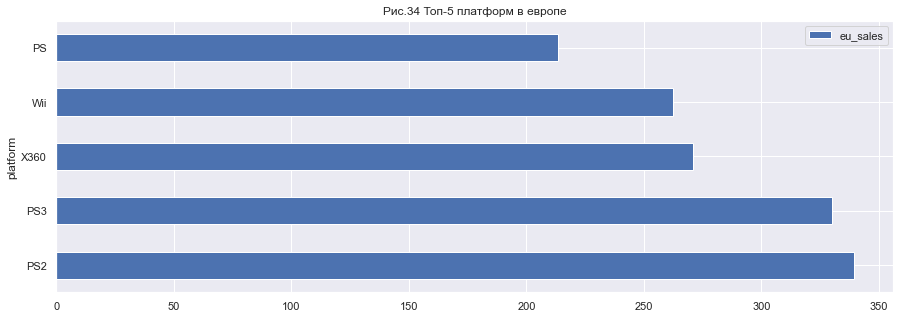

In [292]:
(games
 .groupby(by='platform')
 .agg({'eu_sales':'sum'})
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.34 Топ-5 платформ в Европе')
plt.show()

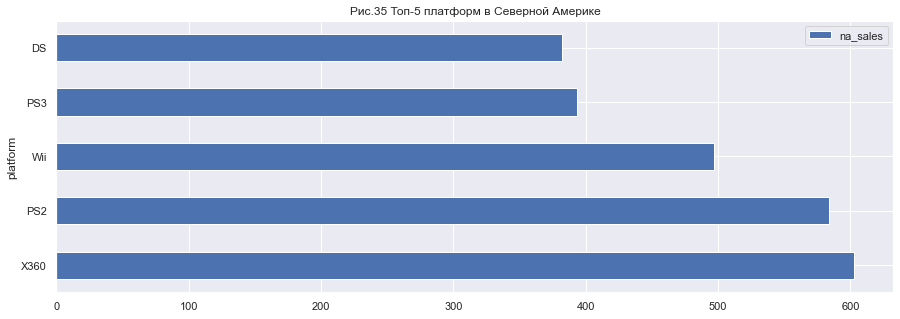

In [293]:
(games
 .groupby(by='platform')
 .agg({'na_sales':'sum'})
 .sort_values(by='na_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.35 Топ-5 платформ в Северной Америке')
plt.show()

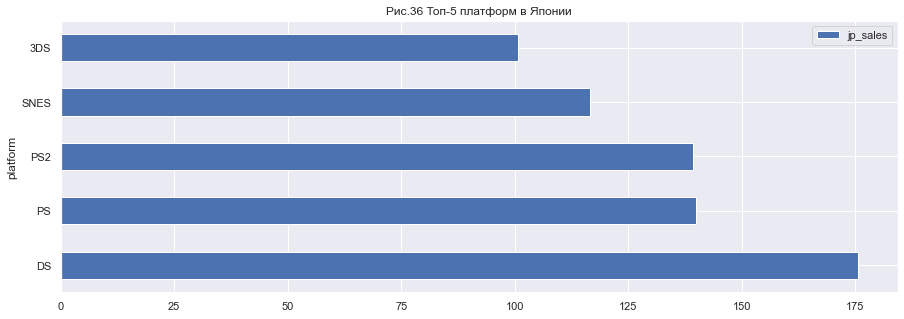

In [295]:
(games
 .groupby(by='platform')
 .agg({'jp_sales':'sum'})
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.36 Топ-5 платформ в Японии')
plt.show()

Европейцы предпочитают приставки от *Sony.*  
*Xbox 360* на почетном третьем месте. Её почти догнала *Wii.*  
Замыкает пятёрку лидиров легендарная *PlayStation*.

Североамериканцы же в вопросе: "Что лучше *Xbox 360* или *PlayStation 3*?", чётко ответили самыми большими продажами *Xbox 360.*  
Но *PlayStation 2* осталась в сердцах геймеров этого региона. Она на вторм месте.  
Сможет ли *Sony* когда-нибудь повторить такой успех?  
*Wii* в тройке лидиров и для *Nintendo* это бесусловный успех.  
*PLayStation 3* не смогла повторить упех своей предшесвенницы, и её почти догнада портативная *DS*.

Игроки из региона "восходящего солнца" самые оригинальные со своей любовью к портативным консолям.  
*DS* на первом месте, а *3DS* замыкает пятерку лидеров.  
Не японцы ли поддерживают долгий жизненный цикл "карманных" консолей?  
В общем лидируют японские производители консолей *Nintendo* и *Sony.*  
*PS* и *PS2* на втором и третьем местах соответственно.  
*Super Nintendo Entertainment System* на четвёртом.  
Вот это поддержка отечественного производителя.

#### Рассмотрим какие жанры предпочитают геймеры в разных регионах

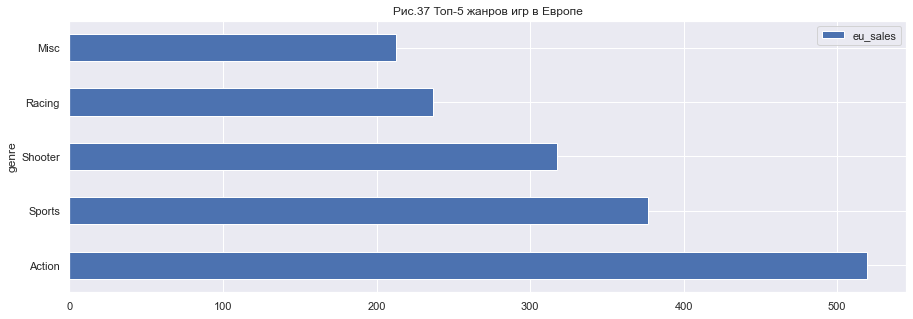

In [296]:
(games
 .groupby(by='genre')
 .agg({'eu_sales':'sum'})
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.37 Топ-5 жанров игр в Европе')
plt.show()

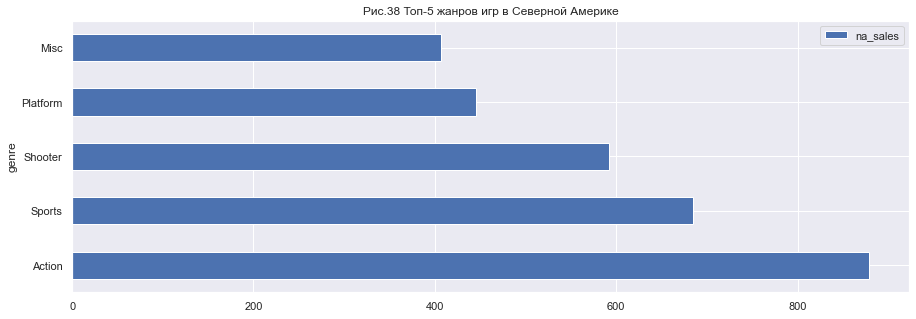

In [297]:
(games
 .groupby(by='genre')
 .agg({'na_sales':'sum'})
 .sort_values(by='na_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.38 Топ-5 жанров игр в Северной Америке')
plt.show()

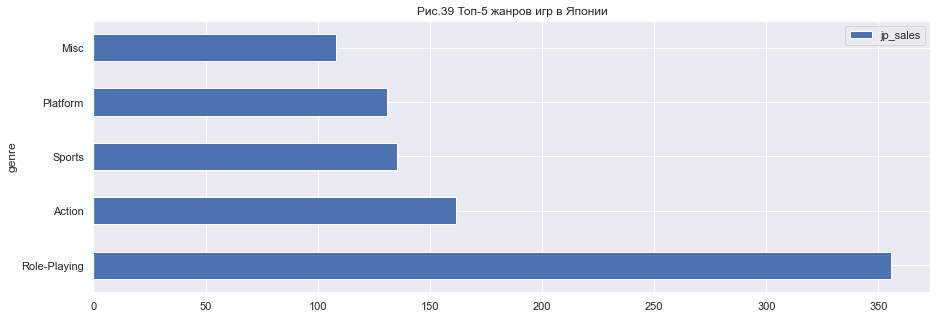

In [298]:
(games
 .groupby(by='genre')
 .agg({'jp_sales':'sum'})
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.39 Топ-5 жанров игр в Японии')
plt.show()

В жанровых предпочтениях игроки из Европы и Северной Америки оказались единодушны в любви к *Action* и *Sports*-играм.  
А вот японские геймеры выделяются страстью к *Role-Playing*-играм.  
Японцы славятся своей любовью к *RPG* ещё с 80-х годов.  
В мире даже выделяют такой поджанр - *Japanese Role-Playing Game* или *JRPG.*  
Извращенцы одним словом.

#### Определим влмияние рейтинга от ESRB на продажи в отдельном регионе.

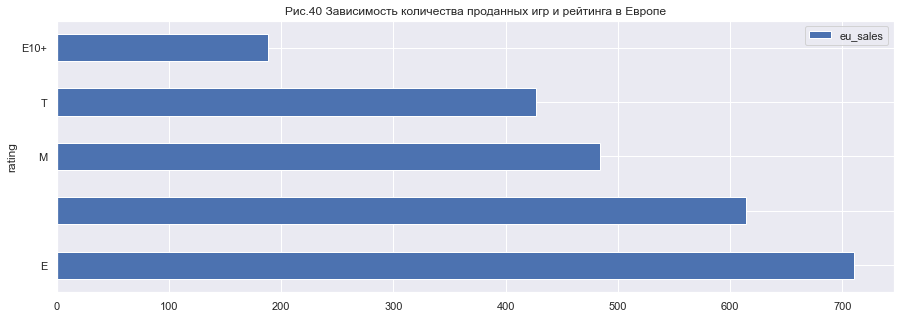

In [299]:
(games
 .groupby(by='rating')
 .agg({'eu_sales':'sum'})
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.40 Зависимость количества проданных игр и рейтинга в Европе')
plt.show()

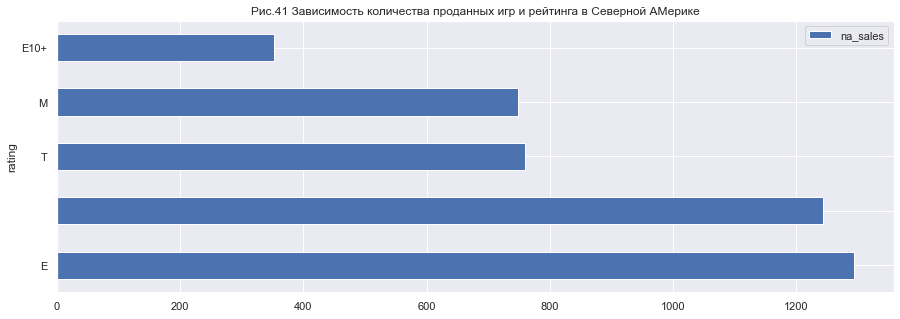

In [301]:
(games
 .groupby(by='rating')
 .agg({'na_sales':'sum'})
 .sort_values(by='na_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.41 Зависимость количества проданных игр и рейтинга в Северной АМерике')
plt.show()

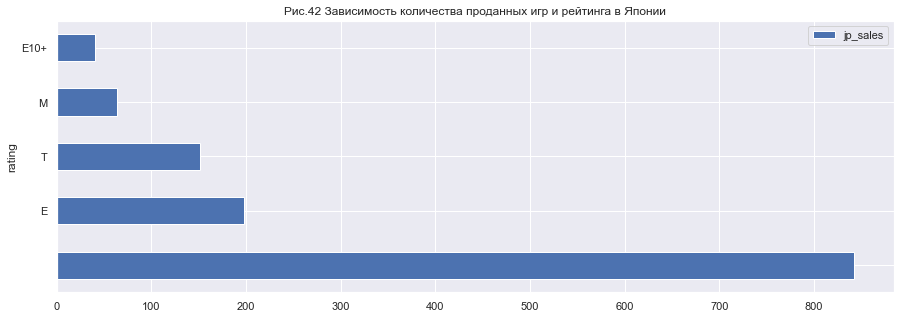

In [302]:
(games
 .groupby(by='rating')
 .agg({'jp_sales':'sum'})
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
 .plot(grid = True, kind = 'barh', figsize = (15, 5))
)
plt.title('Рис.42 Зависимость количества проданных игр и рейтинга в Японии')
plt.show()

По столбцу *rating* в наших данных очень много пропусков, и эти пропуски лидируют в японском регионе, а в европейском и североамериканском занимают второе место.  
Может быть это связано со стоимостью получения рейтинга. Или наличием собственных рейтинговых организаций в Европе и Японии.  
Распределение идентифицированных рейтингов игр показывает лидерство категории "для всех 6+" во всех регионах.  
Рейтинги "подросткам +13" и "взрослым" делят второе и третье места.  
Последний в четверке - "детямот 10 лет".  

### 4. <a name="4">Проверка гипотез</a>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задать самостоятельно пороговое значение alpha.<br>
Пояснить:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

#### Гипотеза 1
За нулевую гипотезу примем:
* *H0 Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.*

Альтернативная гипотеза:
* *H1 Средние пользовательские рейтинги платформ Xbox One и PC различны.*

In [188]:
alpha = 0.05
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
if np.var(xbox)==np.var(pc):
    print('Средние пользовательские рейтинги платформ Xbox One и PC одинаковы')
else:
    print('Средние пользовательские рейтинги платформ Xbox One и PC различаются')

Средние пользовательские рейтинги платформ Xbox One и PC различаются


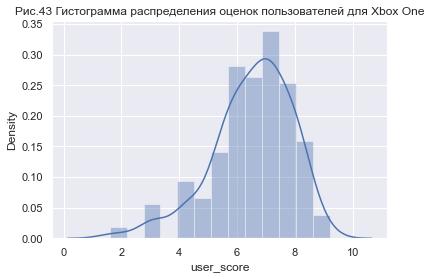

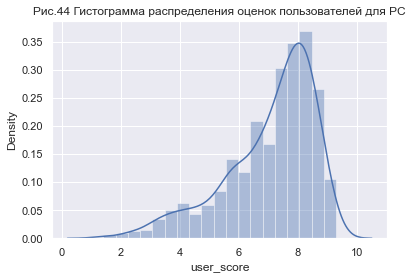

In [330]:
sns.distplot(xbox)
plt.title('Рис.43 Гистограмма распределения оценок пользователей для Xbox One')
plt.show()

sns.distplot(pc)
plt.title('Рис.44 Гистограмма распределения оценок пользователей для PC')
plt.show()

Распределение Гауссовское, используем Т-критерий Стьюдентса, дисперсия выборок не равна

In [191]:
results = st.ttest_ind(xbox, pc, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


Дисперсии не равны.  
Нулевая гипотеза отвергнута.  
Можем сделать вывод, что средние пользовательские рейтинги платформ *Xbox One* и *PC* различаются

#### Гипотеза 2
За нулевую гипотезу примем:
* *H0 Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.*

Альтернативная гипотеза:
* *H1 Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.*

In [303]:
alpha = 0.05
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
if np.var(action)==np.var(sports):
    print('Средние пользовательские рейтинги жанров Action и Sports одинаковы.')
else:
    print('Средние пользовательские рейтинги жанров Action и Sports разные.')

Средние пользовательские рейтинги жанров Action и Sports разные.


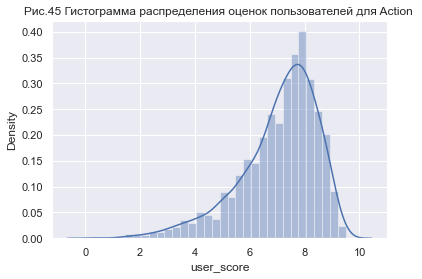

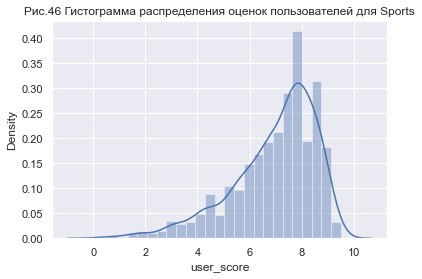

In [331]:
sns.distplot(action)
plt.title('Рис.45 Гистограмма распределения оценок пользователей для Action ')
plt.show()

sns.distplot(sports)
plt.title('Рис.46 Гистограмма распределения оценок пользователей для Sports')
plt.show()

##### Распределение Гауссовское, используем Т-критерий Стьюдентса, дисперсия выборок не равна.

In [306]:
results=st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги жанров и неодинаковы, с вероятностью в  10% такое или большее различие можно получить случайно.  
Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средние пользовательскими рейтингами жанров.

#### Вывод:
- пользовательские рейтинги для платформ Xbox и PC различны
- cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различаются не значительно.

### 5. <a name="5">Выводы</a>

Очень большую часть рынка видеоигр забрали мобильные устройства.  
Но пока люди играют на консолях - сами консоли и игры для них будут производиться.  
Так же в нашу таблицу не попали игры *free-to-play*, которые развиваются с конца 90-х.

В пятерке консолей с наибольшим количеством проданных игр датой выхода в продажу значится середина 2000-х, только лидер - PlayStation 2 - выпустился на рынок в 2000-ом году.  
Самую большую долю рынка консолей занимают три компании: *Nintedo, Sony, Microsoft.*
Период от первых продаж игр для консоли до исчезновения их в среднем занимает 10 лет.  
Период для появления платформы и выхода из нее с 1980 до 2000 такой же, как и для платформ с 2000 до 2016, от 9 до 11 лет.  
И это справедливо как для стационарных, так и для портативных консолей.  
Так же можно заметить что поддержку консолей производители продолжают до момента прекращения продаж на них, что лочично.
Прекращение продаж связано с переходом геймеров на новые консоли с большими возможностями.


Потенциально прибыльны платформы *PS4*, *XOne* и *3DS.*

Выше оценки - выше продажи, и не важно оценил игру пользователь или критик.

Во всех регионах в топ-5 входят приставки от *Sony*, *Microsoft* и *Nintendo.*
В Европе предпочитают стационарные приставки от *Sony*, в Северной Америке - от *Microsoft*, а японцы любят играть приставки от *Nintendo* (причём портативные - самые популярные) и *Sony*.  

*Action* - наиболее многочисленный и популярный жанр во все времена.  
Он приносит больше всего дохода в Европе и Северной Америке.  
Только в Японии больше продаж у *Role-Playing.* Можно считать это "национальной особенность" японских геймеров.  
Также во всех регионах достаточно популярны *Sport* и *Music*-игры. Спорт и музыка объединяют народы.

Зависимость от рейтинга отслеживается во всех трех регионах.  
Наиболее популярны игры с рейтингом "для всех", "подросткам","детям старше 10 лет" и "для взрослых".  
Большое количество игр без рейтинга в Японии может быть связано со стоимостью получения рейтинга или наличием собственных рейтинговых организаций в Японии.



<center>Список литературы</center>

1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
3. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017. 
4.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
6.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018. 